In [ ]:
!pip install networkx pyvis python-louvain tqdm numpy pandas matplotlib seaborn
!pip install nltk sentence-transformers networkx tqdm seaborn
!pip unyinstall node2vec

In [ ]:
!pip install nltk

import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
!pip install node2vec --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 50.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
node2vec 0.5.0 requires numpy<2.0.0,>=1.24.0, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-many

In [ ]:
!pip install --upgrade --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling nu

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import pickle
import warnings
from tqdm.notebook import tqdm

import torch
from sentence_transformers import SentenceTransformer
from node2vec import Node2Vec

import json
import ast
from collections import Counter
import pickle
import os

import community as community_louvain
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from scipy.sparse import csr_matrix
from collections import Counter
import umap

import networkx as nx
from collections import Counter
import community as community_louvain
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

# Configuration pour de meilleurs graphiques
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Acquisition des donnees

In [ ]:
def analyze_file_structure(file_path):
    """
    Analyse la structure du fichier pour déterminer le séparateur et détecter
    d'éventuels problèmes de format.
    """
    # Vérifier si le fichier existe
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Le fichier {file_path} n'existe pas.")

    # Lire les premières lignes du fichier
    with open(file_path, 'r', encoding='utf-8', errors='replace') as f:
        header = f.readline().strip()
        first_lines = [f.readline().strip() for _ in range(5) if f]  # Jusqu'à 5 lignes

    # Déterminer le séparateur
    sep = '\t' if '\t' in header else ',' if ',' in header else None

    # Analyser la structure des colonnes
    if sep:
        columns = header.split(sep)
        n_columns = len(columns)

        # Vérifier si les lignes suivantes ont le même nombre de colonnes
        lines_correct = []
        for line in first_lines:
            fields = line.split(sep)
            lines_correct.append(len(fields) == n_columns)

        # Déterminer les types des colonnes d'après les premières lignes
        column_types = {}
        for i, col in enumerate(columns):
            values = [line.split(sep)[i] for line in first_lines if len(line.split(sep)) > i]

            # Vérifier si la colonne contient des listes
            contains_lists = any('[' in val and ']' in val for val in values)

            # Vérifier si la colonne contient des nombres
            try:
                all_numeric = all(float(val) for val in values if val and val.strip())
                is_numeric = True
            except ValueError:
                all_numeric = False
                is_numeric = False

            column_types[col] = {
                'seems_numeric': is_numeric,
                'seems_list': contains_lists,
                'example_values': values[:2]  # Quelques exemples
            }

        return {
            'separator': sep,
            'n_columns': n_columns,
            'columns': columns,
            'all_lines_correct': all(lines_correct),
            'column_types': column_types,
            'header': header,
            'first_lines': first_lines
        }
    else:
        return {
            'separator': None,
            'error': "Impossible de déterminer le séparateur",
            'header': header,
            'first_lines': first_lines
        }

def load_data(file_path):
    """
    Charge les données en tenant compte de la structure du fichier.
    """
    print(f"Analyse du fichier {file_path}...")

    # Analyser la structure du fichier
    structure = analyze_file_structure(file_path)

    if not structure.get('separator'):
        print("ERREUR: Impossible de déterminer le séparateur du fichier.")
        print(f"En-tête: {structure['header']}")
        print(f"Premières lignes: {structure['first_lines']}")
        raise ValueError("Format de fichier non reconnu")

    # Afficher des informations sur la structure
    print(f"Séparateur détecté: '{structure['separator']}'")
    print(f"Nombre de colonnes: {structure['n_columns']}")
    print(f"Colonnes: {structure['columns']}")

    if not structure['all_lines_correct']:
        print("AVERTISSEMENT: Certaines lignes n'ont pas le bon nombre de colonnes.")

    # Afficher des informations sur les types de colonnes
    print("\nTypes de colonnes détectés:")
    for col, info in structure['column_types'].items():
        if info['seems_list']:
            print(f"  * {col}: semble contenir des listes")
        elif info['seems_numeric']:
            print(f"  * {col}: semble contenir des nombres")
        else:
            print(f"  * {col}: semble contenir du texte")
        print(f"    Exemples: {info['example_values']}")

    # Chargement des données avec les paramètres appropriés
    try:
        df = pd.read_csv(
            file_path,
            sep=structure['separator'],
            quoting=3,  # QUOTE_NONE
            encoding='utf-8',
            on_bad_lines='skip'  # Pandas >= 1.3.0
        )
        print(f"Données chargées avec succès. Shape: {df.shape}")
        return df
    except Exception as e:
        print(f"ERREUR lors du chargement: {e}")

        # Tentative avec d'autres paramètres
        try:
            print("Tentative avec d'autres paramètres...")
            df = pd.read_csv(
                file_path,
                sep=structure['separator'],
                quoting=3,
                encoding='utf-8',
                engine='python'  # Plus flexible mais plus lent
            )
            print(f"Données chargées avec succès. Shape: {df.shape}")
            return df
        except Exception as e2:
            print(f"ERREUR lors de la deuxième tentative: {e2}")
            raise

def safe_literal_eval(val):
    """
    Évalue en toute sécurité une chaîne comme une expression Python littérale.
    Renvoie une liste vide en cas d'échec.
    """
    if not isinstance(val, str):
        return []

    # Si la chaîne commence et se termine par des crochets, c'est probablement une liste
    if val.startswith('[') and val.endswith(']'):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            # Si l'évaluation échoue, tenter de nettoyer la chaîne
            try:
                # Nettoyer la chaîne en remplaçant les caractères problématiques
                cleaned_val = re.sub(r'[^\[\],\'\"a-zA-Z0-9_-]', ' ', val)
                return ast.literal_eval(cleaned_val)
            except (ValueError, SyntaxError):
                return []

    # Si ce n'est pas une liste mais une chaîne simple (peut-être un titre), le retourner tel quel
    return []

def clean_data(df):
    """
    Nettoie les données en convertissant les formats, gérant les valeurs manquantes, etc.
    Version robuste qui gère mieux les cas problématiques.
    """
    print("Nettoyage des données...")

    # Copie pour éviter de modifier l'original
    df_clean = df.copy()

    # Nettoyage des noms de colonnes (espaces, minuscules)
    df_clean.columns = [col.strip().lower() for col in df_clean.columns]

    # Conversion des auteurs
    if 'authors' in df_clean.columns:
        print("Conversion de la colonne 'authors'...")
        # Méthode 1: utiliser une regex pour extraire les noms entre crochets
        df_clean['authors'] = df_clean['authors'].apply(
            lambda x: safe_literal_eval(x) if isinstance(x, str) else []
        )
    else:
        print("AVERTISSEMENT: Colonne 'authors' manquante.")

    # Conversion des références
    if 'references' in df_clean.columns:
        print("Conversion de la colonne 'references'...")
        df_clean['references'] = df_clean['references'].apply(
            lambda x: safe_literal_eval(x) if isinstance(x, str) else []
        )
    else:
        print("AVERTISSEMENT: Colonne 'references' manquante.")

    # Conversion de l'année en entier
    if 'year' in df_clean.columns:
        df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce').fillna(0).astype(int)

    # Conversion du nombre de citations en entier
    if 'n_citation' in df_clean.columns:
        df_clean['n_citation'] = pd.to_numeric(df_clean['n_citation'], errors='coerce').fillna(0).astype(int)

    # Gestion des valeurs manquantes pour les colonnes textuelles
    text_columns = ['abstract', 'title', 'venue']
    for col in text_columns:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].fillna('')

    # Conversion de la classe en entier
    if 'class' in df_clean.columns:
        df_clean['class'] = pd.to_numeric(df_clean['class'], errors='coerce').fillna(0).astype(int)

    print(f"Nettoyage terminé. Shape après nettoyage: {df_clean.shape}")

    return df_clean

def compute_statistics(df):
    """
    Calcule les statistiques demandées sur le corpus.
    """
    print("Calcul des statistiques...")

    stats = {}

    # Nombre de documents
    stats['n_documents'] = len(df)

    # Taille moyenne des documents (en nombre de caractères dans le résumé)
    if 'abstract' in df.columns:
        stats['avg_abstract_length'] = df['abstract'].astype(str).str.len().mean()

    # Liste de tous les auteurs (avec doublons)
    if 'authors' in df.columns:
        all_authors = []
        for authors_list in df['authors']:
            if isinstance(authors_list, list):
                all_authors.extend(authors_list)

        # Nombre d'auteurs uniques
        unique_authors = set(all_authors)
        stats['n_unique_authors'] = len(unique_authors)

        # Nombre moyen d'auteurs par document
        stats['avg_authors_per_doc'] = df['authors'].apply(
            lambda x: len(x) if isinstance(x, list) else 0
        ).mean()

        # Distribution des documents par auteur
        author_counts = Counter(all_authors)
        stats['author_publication_counts'] = dict(author_counts)

        # Top 10 des auteurs les plus prolifiques
        stats['top_authors'] = dict(author_counts.most_common(10))

    # Distribution des années de publication
    if 'year' in df.columns:
        year_counts = df['year'].value_counts().sort_index()
        stats['year_distribution'] = year_counts.to_dict()

    # Nombre et distribution des classes
    if 'class' in df.columns:
        class_counts = df['class'].value_counts().sort_index()
        stats['class_distribution'] = class_counts.to_dict()
        stats['n_classes'] = len(class_counts)

    # Nombre moyen de citations par document
    if 'n_citation' in df.columns:
        stats['avg_citations_per_doc'] = df['n_citation'].mean()

    # Nombre moyen de références par document
    if 'references' in df.columns:
        stats['avg_references_per_doc'] = df['references'].apply(
            lambda x: len(x) if isinstance(x, list) else 0
        ).mean()

    print("Calcul des statistiques terminé.")

    return stats

def visualize_statistics(df, stats, output_filename="corpus_statistics.png"):
    """
    Crée des visualisations pour les statistiques calculées.
    """
    print("Création des visualisations...")

    # Déterminer le nombre de sous-graphiques nécessaire
    n_plots = 0
    has_class = 'class' in df.columns and 'class_distribution' in stats
    has_year = 'year' in df.columns and 'year_distribution' in stats
    has_authors = 'authors' in df.columns and 'top_authors' in stats
    has_citations = 'n_citation' in df.columns
    has_references = 'references' in df.columns

    if has_class:
        n_plots += 1
    if has_year:
        n_plots += 1
    if has_authors:
        n_plots += 1
    if has_citations:
        n_plots += 1
    if has_references:
        n_plots += 1
    if 'authors' in df.columns:
        n_plots += 1

    # Calculer les dimensions de la figure
    n_rows = max(1, (n_plots + 1) // 2)  # Arrondir vers le haut
    n_cols = min(2, n_plots)

    # Figure principale
    plt.figure(figsize=(15, 5 * n_rows))

    plot_idx = 1

    # 1. Distribution des documents par classe
    if has_class:
        plt.subplot(n_rows, n_cols, plot_idx)
        sns.barplot(x=list(stats['class_distribution'].keys()),
                    y=list(stats['class_distribution'].values()))
        plt.title('Distribution des documents par classe')
        plt.xlabel('Classe')
        plt.ylabel('Nombre de documents')
        plot_idx += 1

    # 2. Distribution temporelle des publications
    if has_year:
        plt.subplot(n_rows, n_cols, plot_idx)
        sns.barplot(x=list(stats['year_distribution'].keys()),
                    y=list(stats['year_distribution'].values()))
        plt.title('Distribution temporelle des publications')
        plt.xlabel('Année')
        plt.ylabel('Nombre de documents')
        plt.xticks(rotation=45)
        plot_idx += 1

    # 3. Distribution du nombre d'auteurs par document
    if 'authors' in df.columns:
        plt.subplot(n_rows, n_cols, plot_idx)
        sns.histplot(df['authors'].apply(lambda x: len(x) if isinstance(x, list) else 0),
                     bins=20, kde=True)
        plt.title('Distribution du nombre d\'auteurs par document')
        plt.xlabel('Nombre d\'auteurs')
        plt.ylabel('Nombre de documents')
        plot_idx += 1

    # 4. Distribution du nombre de citations par document
    if has_citations:
        plt.subplot(n_rows, n_cols, plot_idx)
        sns.histplot(df['n_citation'], bins=20, kde=True)
        plt.title('Distribution du nombre de citations par document')
        plt.xlabel('Nombre de citations')
        plt.ylabel('Nombre de documents')
        plot_idx += 1

    # 5. Distribution du nombre de références par document
    if has_references:
        plt.subplot(n_rows, n_cols, plot_idx)
        sns.histplot(df['references'].apply(lambda x: len(x) if isinstance(x, list) else 0),
                     bins=20, kde=True)
        plt.title('Distribution du nombre de références par document')
        plt.xlabel('Nombre de références')
        plt.ylabel('Nombre de documents')
        plot_idx += 1

    # 6. Top 10 des auteurs les plus prolifiques
    if has_authors:
        plt.subplot(n_rows, n_cols, plot_idx)
        top_authors_df = pd.DataFrame({
            'author': list(stats['top_authors'].keys()),
            'count': list(stats['top_authors'].values())
        })
        sns.barplot(x='count', y='author', data=top_authors_df)
        plt.title('Top 10 des auteurs les plus prolifiques')
        plt.xlabel('Nombre de publications')
        plot_idx += 1

    plt.tight_layout()
    plt.savefig(output_filename, dpi=300)
    print(f"Visualisations enregistrées dans '{output_filename}'")

    plt.close()

# Configuration pour de meilleurs graphiques dans Jupyter
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)  # Taille par défaut des figures

def visualize_statistics_notebook(df, stats, save_to_file=True, output_filename="corpus_statistics.png"):
    """
    Crée et affiche des visualisations pour les statistiques calculées directement dans le notebook.

    Args:
        df (pd.DataFrame): DataFrame nettoyé
        stats (dict): Dictionnaire contenant les statistiques calculées
        save_to_file (bool): Si True, sauvegarde aussi les visualisations dans un fichier
        output_filename (str): Nom du fichier de sortie si save_to_file est True
    """
    print("Création des visualisations...")

    # Déterminer le nombre de sous-graphiques nécessaire
    n_plots = 0
    has_class = 'class' in df.columns and 'class_distribution' in stats
    has_year = 'year' in df.columns and 'year_distribution' in stats
    has_authors = 'authors' in df.columns and 'top_authors' in stats
    has_citations = 'n_citation' in df.columns
    has_references = 'references' in df.columns

    if has_class:
        n_plots += 1
    if has_year:
        n_plots += 1
    if has_authors:
        n_plots += 1
    if has_citations:
        n_plots += 1
    if has_references:
        n_plots += 1
    if 'authors' in df.columns:
        n_plots += 1

    # Calculer les dimensions de la figure
    n_rows = max(1, (n_plots + 1) // 2)  # Arrondir vers le haut
    n_cols = min(2, n_plots)

    # Figure principale
    fig = plt.figure(figsize=(15, 5 * n_rows))

    plot_idx = 1

    # 1. Distribution des documents par classe
    if has_class:
        plt.subplot(n_rows, n_cols, plot_idx)
        sns.barplot(x=list(stats['class_distribution'].keys()),
                    y=list(stats['class_distribution'].values()))
        plt.title('Distribution des documents par classe')
        plt.xlabel('Classe')
        plt.ylabel('Nombre de documents')
        plot_idx += 1

    # 2. Distribution temporelle des publications
    if has_year:
        plt.subplot(n_rows, n_cols, plot_idx)
        sns.barplot(x=list(stats['year_distribution'].keys()),
                    y=list(stats['year_distribution'].values()))
        plt.title('Distribution temporelle des publications')
        plt.xlabel('Année')
        plt.ylabel('Nombre de documents')
        plt.xticks(rotation=45)
        plot_idx += 1

    # 3. Distribution du nombre d'auteurs par document
    if 'authors' in df.columns:
        plt.subplot(n_rows, n_cols, plot_idx)
        sns.histplot(df['authors'].apply(lambda x: len(x) if isinstance(x, list) else 0),
                     bins=20, kde=True)
        plt.title('Distribution du nombre d\'auteurs par document')
        plt.xlabel('Nombre d\'auteurs')
        plt.ylabel('Nombre de documents')
        plot_idx += 1

    # 4. Distribution du nombre de citations par document
    if has_citations:
        plt.subplot(n_rows, n_cols, plot_idx)
        sns.histplot(df['n_citation'], bins=20, kde=True)
        plt.title('Distribution du nombre de citations par document')
        plt.xlabel('Nombre de citations')
        plt.ylabel('Nombre de documents')
        plot_idx += 1

    # 5. Distribution du nombre de références par document
    if has_references:
        plt.subplot(n_rows, n_cols, plot_idx)
        sns.histplot(df['references'].apply(lambda x: len(x) if isinstance(x, list) else 0),
                     bins=20, kde=True)
        plt.title('Distribution du nombre de références par document')
        plt.xlabel('Nombre de références')
        plt.ylabel('Nombre de documents')
        plot_idx += 1

    # 6. Top 10 des auteurs les plus prolifiques
    if has_authors:
        plt.subplot(n_rows, n_cols, plot_idx)
        top_authors_df = pd.DataFrame({
            'author': list(stats['top_authors'].keys()),
            'count': list(stats['top_authors'].values())
        })
        sns.barplot(x='count', y='author', data=top_authors_df)
        plt.title('Top 10 des auteurs les plus prolifiques')
        plt.xlabel('Nombre de publications')
        plot_idx += 1

    plt.tight_layout()

    # Sauvegarder dans un fichier si demandé
    if save_to_file:
        plt.savefig(output_filename, dpi=300)
        print(f"Visualisations sauvegardées dans '{output_filename}'")

    # Afficher dans le notebook
    plt.show()

def check_supervised_classification(df):
    """
    Vérifie si les données permettent une classification supervisée.
    """
    # Vérifier s'il y a une colonne de classe
    if 'class' not in df.columns:
        print("AVERTISSEMENT: Pas de colonne de classe trouvée.")
        return False

    # Vérifier si la colonne de classe contient des valeurs
    n_classes = len(df['class'].unique())
    if n_classes <= 1:
        print(f"AVERTISSEMENT: Une seule classe trouvée ({n_classes}). Classification impossible.")
        return False

    # Vérifier le nombre d'exemples par classe
    class_counts = df['class'].value_counts()
    min_samples = class_counts.min()
    if min_samples < 5:
        print(f"AVERTISSEMENT: Certaines classes ont très peu d'exemples (minimum: {min_samples}).")
        print("La classification reste possible mais pourrait être biaisée.")

    # Vérifier si les caractéristiques nécessaires sont présentes
    has_text = False
    for col in ['abstract', 'title']:
        if col in df.columns and df[col].astype(str).str.len().mean() > 0:
            has_text = True
            break

    if not has_text:
        print("AVERTISSEMENT: Pas assez d'information textuelle pour la classification.")
        return False

    print(f"La classification supervisée est possible avec {n_classes} classes.")
    print(f"Distribution des classes: {class_counts.to_dict()}")

    return True

def save_processed_data(df, output_path):
    """
    Sauvegarde les données nettoyées dans différents formats pour une utilisation ultérieure.
    """
    # Sauvegarde au format CSV
    df.to_csv(f"{output_path}.csv", index=False, sep='\t', encoding='utf-8')

    # Sauvegarde au format pickle (pour préserver les types Python comme les listes)
    with open(f"{output_path}.pkl", 'wb') as f:
        pickle.dump(df, f)

    print(f"Données sauvegardées dans {output_path}.csv et {output_path}.pkl")


In [ ]:
# Chemin vers le fichier de données
input_file = "data_project.csv"
output_prefix = "corpus_processed"

# Chargement des données
df = load_data(input_file)

Analyse du fichier data_project.csv...
Séparateur détecté: '	'
Nombre de colonnes: 9
Colonnes: ['venue', 'abstract', 'authors', 'n_citation', 'references', 'title', 'year', 'id', 'class']

Types de colonnes détectés:
  * venue: semble contenir du texte
    Exemples: ['international conference on human-computer interaction', 'visual analytics science and technology']
  * abstract: semble contenir du texte
    Exemples: ['The purpose of this study is to develop a learning tool for high school students studying the scientific aspects of information and communication net- works. More specifically, we focus on the basic principles of network proto- cols as the aim to develop our learning tool. Our tool gives students hands-on experience to help understand the basic principles of network protocols.', "This paper describes the design and implementation of a methodology for the visualisation and hypothetical virtual reconstruction of Roman polychrome statuary for research purposes. The methodo

In [ ]:
# Aperçu des données brutes
print("\nAperçu des données brutes:")
print(df.head())
print("\nInformations sur les colonnes:")
print(df.info())


Aperçu des données brutes:
                                               venue  \
0  international conference on human-computer int...   
1            visual analytics science and technology   
2       pattern recognition and machine intelligence   
3  international conference on computer graphics ...   
4  international symposium on computer and inform...   

                                            abstract  \
0  The purpose of this study is to develop a lear...   
1  This paper describes the design and implementa...   
2  This article applied GARCH model instead AR or...   
3                                                NaN   
4                                                NaN   

                                             authors n_citation  \
0  ['Makoto Satoh', 'Ryo Muramatsu', 'Mizue Kayam...          0   
1                    ['Gareth Beale', 'Graeme Earl']         50   
2  ['Altaf Hossain', 'Faisal Zaman', 'Mohammed Na...         50   
3  ['Rafael Álvarez', 'Leandro

In [ ]:
# Nettoyage des données
df_clean = clean_data(df)

# Aperçu des données nettoyées
print("\nAperçu des données nettoyées:")
print(df_clean.head())

Nettoyage des données...
Conversion de la colonne 'authors'...
Conversion de la colonne 'references'...
Nettoyage terminé. Shape après nettoyage: (40597, 9)

Aperçu des données nettoyées:
                                               venue  \
0  international conference on human-computer int...   
1            visual analytics science and technology   
2       pattern recognition and machine intelligence   
3  international conference on computer graphics ...   
4  international symposium on computer and inform...   

                                            abstract  \
0  The purpose of this study is to develop a lear...   
1  This paper describes the design and implementa...   
2  This article applied GARCH model instead AR or...   
3                                                      
4                                                      

                                             authors  n_citation  \
0  [Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...           0   
1 

In [ ]:
# Vérification de la possibilité de classification supervisée
classification_possible = check_supervised_classification(df_clean)
classification_possible

AVERTISSEMENT: Certaines classes ont très peu d'exemples (minimum: 2).
La classification reste possible mais pourrait être biaisée.
La classification supervisée est possible avec 9 classes.
Distribution des classes: {1: 10099, 2: 7387, 5: 5223, 8: 4812, 7: 4713, 6: 3570, 4: 2500, 3: 2291, 0: 2}


True

In [ ]:
# Calcul des statistiques
stats = compute_statistics(df_clean)

# Affichage des statistiques principales
print("\nStatistiques principales:")
if 'n_documents' in stats:
    print(f"Nombre de documents: {stats['n_documents']}")
if 'n_unique_authors' in stats:
    print(f"Nombre d'auteurs uniques: {stats['n_unique_authors']}")
if 'avg_authors_per_doc' in stats:
    print(f"Nombre moyen d'auteurs par document: {stats['avg_authors_per_doc']:.2f}")
if 'n_classes' in stats:
    print(f"Nombre de classes: {stats['n_classes']}")
if 'avg_abstract_length' in stats:
    print(f"Longueur moyenne des résumés: {stats['avg_abstract_length']:.2f} caractères")
if 'avg_citations_per_doc' in stats:
    print(f"Nombre moyen de citations par document: {stats['avg_citations_per_doc']:.2f}")
if 'avg_references_per_doc' in stats:
    print(f"Nombre moyen de références par document: {stats['avg_references_per_doc']:.2f}")


Calcul des statistiques...
Calcul des statistiques terminé.

Statistiques principales:
Nombre de documents: 40597
Nombre d'auteurs uniques: 80845
Nombre moyen d'auteurs par document: 2.82
Nombre de classes: 9
Longueur moyenne des résumés: 392.49 caractères
Nombre moyen de citations par document: 21.03
Nombre moyen de références par document: 5.58


In [ ]:
# Sauvegarde des statistiques
with open(f"{output_prefix}_stats.json", 'w', encoding='utf-8') as f:
    # Convertir les clés numériques en strings pour JSON
    json_stats = {k: (str(v) if isinstance(v, dict) and any(isinstance(key, int) for key in v.keys()) else v)
                    for k, v in stats.items()}
    json.dump(json_stats, f, indent=4, ensure_ascii=False)


In [ ]:
# Création des visualisations
visualize_statistics(df_clean, stats)

Création des visualisations...
Visualisations enregistrées dans 'corpus_statistics.png'


Création des visualisations...
Visualisations sauvegardées dans 'corpus_statistics.png'


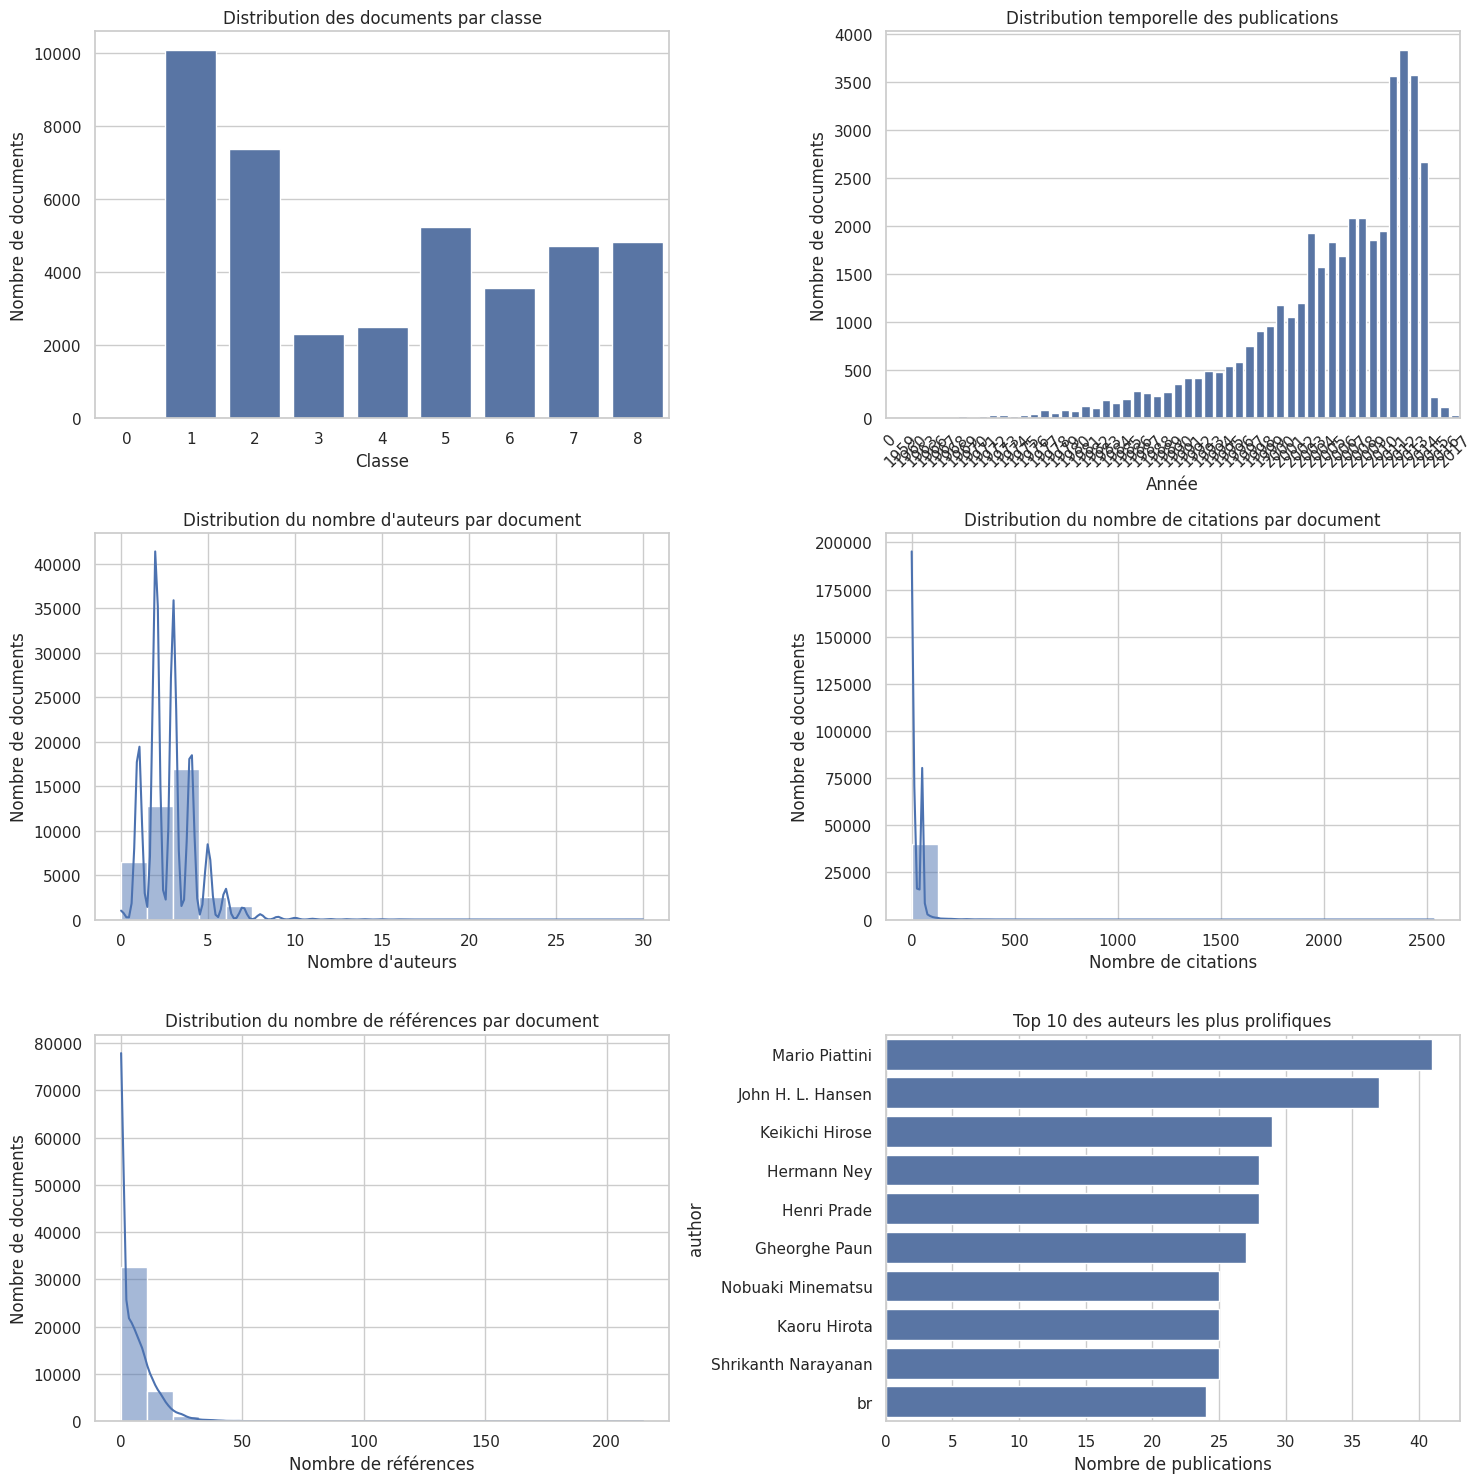

In [ ]:
visualize_statistics_notebook(df_clean, stats)

In [ ]:
# Sauvegarde des données nettoyées
save_processed_data(df_clean, output_prefix)

Données sauvegardées dans corpus_processed.csv et corpus_processed.pkl


# Prise en compte de la structure du corpus

In [ ]:
# Chargement des données (utiliser le DataFrame nettoyé de la partie 1)
# Si vous avez sauvegardé le DataFrame dans un fichier pickle
import pickle
try:
    with open('corpus_processed.pkl', 'rb') as f:
        df = pickle.load(f)
    print(f"Données chargées depuis corpus_processed.pkl. Shape: {df.shape}")
except FileNotFoundError:
    # Si le fichier n'existe pas, chargez-le à partir du fichier TSV original
    # et appliquez les fonctions de nettoyage de la partie 1
    file_path = "votre_fichier.tsv"  # Remplacez par le chemin réel
    df = pd.read_csv(file_path, sep='\t', quoting=3, encoding='utf-8')
    print(f"Données chargées depuis {file_path}. Shape: {df.shape}")

    # Fonction simplifiée pour nettoyer les données (à adapter si nécessaire)
    import ast
    def safe_literal_eval(val):
        if not isinstance(val, str):
            return []
        if val.startswith('[') and val.endswith(']'):
            try:
                return ast.literal_eval(val)
            except (ValueError, SyntaxError):
                return []
        return []

    # Nettoyage minimal des données
    df['authors'] = df['authors'].apply(lambda x: safe_literal_eval(x) if isinstance(x, str) else [])
    df['references'] = df['references'].apply(lambda x: safe_literal_eval(x) if isinstance(x, str) else [])
    df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(0).astype(int)
    df['n_citation'] = pd.to_numeric(df['n_citation'], errors='coerce').fillna(0).astype(int)
    df['class'] = pd.to_numeric(df['class'], errors='coerce').fillna(0).astype(int)

# Afficher les premières lignes pour vérification
print("Aperçu des données:")
display(df.head())

Données chargées depuis corpus_processed.pkl. Shape: (40597, 9)
Aperçu des données:


,venue,abstract,authors,n_citation,references,title,year,id,class
0,international conference on human-computer int...,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,2013,00127ee2-cb05-48ce-bc49-9de556b93346,3
1,visual analytics science and technology,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821,3
2,pattern recognition and machine intelligence,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",2009,001c8744-73c4-4b04-9364-22d31a10dbf1,4
3,international conference on computer graphics ...,,"[Rafael Álvarez, Leandro Tortosa, José-Francis...",0,[],COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009,005ce28f-ed77-4e97-afdc-a296137186a1,5
4,international symposium on computer and inform...,,"[Guzin Ulutas, Mustafa Ulutas, Vasif V. Nabiyev]",0,"[5626736c-e434-4e2d-8405-54940fab88ab, 8e87e87...",Improved Secret Image Sharing Method By Encodi...,2011,00701b05-684f-45f9-b281-425abfec482c,8


In [ ]:
# 1. Construction du graphe de citation entre documents
def build_citation_graph(df):
    """
    Construit un graphe orienté où les nœuds sont des documents et
    les arêtes représentent des citations.
    """
    print("Construction du graphe de citation entre documents...")
    G = nx.DiGraph()

    # Ajouter tous les documents comme nœuds
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        G.add_node(row['id'],
                   title=row['title'],
                   year=row['year'],
                   class_id=row['class'],
                   n_citation=row['n_citation'])

    # Ajouter les liens de citation
    edges_added = 0
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        source_id = row['id']
        for ref_id in row['references']:
            if G.has_node(ref_id):  # Vérifier si la référence existe dans notre graphe
                G.add_edge(source_id, ref_id)
                edges_added += 1

    print(f"Graphe de citation construit avec {G.number_of_nodes()} nœuds et {G.number_of_edges()} arêtes.")
    print(f"Nombre d'arêtes ajoutées: {edges_added}")

    return G

# 2. Construction du graphe de collaboration entre auteurs
def build_coauthorship_graph(df):
    """
    Construit un graphe non orienté où les nœuds sont des auteurs et
    les arêtes représentent des collaborations.
    """
    print("Construction du graphe de collaboration entre auteurs...")
    G = nx.Graph()

    author_papers = {}  # Dictionnaire pour stocker les articles de chaque auteur

    # Collecter les articles pour chaque auteur
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        paper_id = row['id']
        for author in row['authors']:
            if author not in author_papers:
                author_papers[author] = []
            author_papers[author].append(paper_id)

    # Ajouter les auteurs comme nœuds
    for author, papers in author_papers.items():
        G.add_node(author, documents=papers)

    # Ajouter les liens de co-autorat
    edges_added = 0
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        authors = row['authors']
        # Créer des liens entre tous les co-auteurs
        for i in range(len(authors)):
            for j in range(i + 1, len(authors)):
                if G.has_edge(authors[i], authors[j]):
                    # Si le lien existe déjà, augmenter son poids
                    G[authors[i]][authors[j]]['weight'] += 1
                else:
                    # Sinon, créer un nouveau lien avec un poids de 1
                    G.add_edge(authors[i], authors[j], weight=1)
                    edges_added += 1

    print(f"Graphe de co-autorat construit avec {G.number_of_nodes()} nœuds et {G.number_of_edges()} arêtes.")
    print(f"Nombre d'arêtes ajoutées: {edges_added}")

    return G

# 3. Analyse du graphe de citation
def analyze_citation_graph(G):
    """
    Analyse le graphe de citation et calcule diverses statistiques.
    """
    print("Analyse du graphe de citation...")
    stats = {}

    # Nombre de nœuds et d'arêtes
    stats['num_nodes'] = G.number_of_nodes()
    stats['num_edges'] = G.number_of_edges()

    # Densité du graphe
    stats['density'] = nx.density(G)

    # Composantes connexes (pour un graphe orienté, on considère le graphe non orienté sous-jacent)
    G_undirected = G.to_undirected()
    components = list(nx.connected_components(G_undirected))
    stats['num_components'] = len(components)
    stats['largest_component_size'] = len(max(components, key=len))
    stats['largest_component_ratio'] = stats['largest_component_size'] / stats['num_nodes']

    # Métriques de centralité (sur un sous-ensemble pour des raisons de performance)
    if G.number_of_nodes() > 1000:
        print("Le graphe est grand, calcul des centralités sur un sous-graphe...")
        # Prendre la plus grande composante connexe
        largest_cc = max(components, key=len)
        subgraph = G.subgraph(largest_cc)
        if len(largest_cc) > 1000:
            # Si toujours trop grand, prendre un échantillon aléatoire
            sample_nodes = np.random.choice(list(largest_cc), 1000, replace=False)
            subgraph = G.subgraph(sample_nodes)
    else:
        subgraph = G

    # Calculer les degrés
    in_degrees = dict(subgraph.in_degree())
    out_degrees = dict(subgraph.out_degree())

    # Distribution des degrés entrants
    in_degree_counts = Counter(in_degrees.values())
    stats['in_degree_distribution'] = dict(in_degree_counts)
    stats['max_in_degree'] = max(in_degrees.values()) if in_degrees else 0
    stats['avg_in_degree'] = sum(in_degrees.values()) / len(in_degrees) if in_degrees else 0

    # Distribution des degrés sortants
    out_degree_counts = Counter(out_degrees.values())
    stats['out_degree_distribution'] = dict(out_degree_counts)
    stats['max_out_degree'] = max(out_degrees.values()) if out_degrees else 0
    stats['avg_out_degree'] = sum(out_degrees.values()) / len(out_degrees) if out_degrees else 0

    # Calculer d'autres mesures de centralité (sur un petit échantillon pour la performance)
    if len(subgraph) <= 500:
        print("Calcul des mesures de centralité avancées...")
        # Centralité betweenness (mesure l'importance d'un nœud comme intermédiaire)
        betweenness = nx.betweenness_centrality(subgraph)
        stats['avg_betweenness'] = sum(betweenness.values()) / len(betweenness)

        # Centralité closeness (mesure la proximité d'un nœud à tous les autres)
        try:
            closeness = nx.closeness_centrality(subgraph)
            stats['avg_closeness'] = sum(closeness.values()) / len(closeness)
        except:
            print("Impossible de calculer la centralité de closeness (graphe non fortement connexe)")

    # Diamètre (distance maximale entre deux nœuds quelconques)
    # Calculé sur la plus grande composante
    try:
        largest_cc_subgraph = G_undirected.subgraph(max(components, key=len))
        stats['diameter'] = nx.diameter(largest_cc_subgraph)
    except:
        print("Impossible de calculer le diamètre (graphe non connexe ou trop grand)")
        stats['diameter'] = "Non calculé"

    return stats

# 4. Analyse du graphe de co-autorat
def analyze_coauthorship_graph(G):
    """
    Analyse le graphe de co-autorat et calcule diverses statistiques.
    """
    print("Analyse du graphe de co-autorat...")
    stats = {}

    # Nombre de nœuds et d'arêtes
    stats['num_nodes'] = G.number_of_nodes()
    stats['num_edges'] = G.number_of_edges()

    # Densité du graphe
    stats['density'] = nx.density(G)

    # Composantes connexes
    components = list(nx.connected_components(G))
    stats['num_components'] = len(components)
    stats['largest_component_size'] = len(max(components, key=len))
    stats['largest_component_ratio'] = stats['largest_component_size'] / stats['num_nodes']

    # Métriques de centralité
    if G.number_of_nodes() > 1000:
        print("Le graphe est grand, calcul des centralités sur un sous-graphe...")
        largest_cc = max(components, key=len)
        if len(largest_cc) > 1000:
            sample_nodes = np.random.choice(list(largest_cc), 1000, replace=False)
            subgraph = G.subgraph(sample_nodes)
        else:
            subgraph = G.subgraph(largest_cc)
    else:
        subgraph = G

    # Calculer les degrés
    degrees = dict(subgraph.degree())

    # Distribution des degrés
    degree_counts = Counter(degrees.values())
    stats['degree_distribution'] = dict(degree_counts)
    stats['max_degree'] = max(degrees.values()) if degrees else 0
    stats['avg_degree'] = sum(degrees.values()) / len(degrees) if degrees else 0

    # Coefficient de clustering moyen (mesure de la transitivité)
    stats['avg_clustering'] = nx.average_clustering(subgraph)

    # Calculer d'autres mesures de centralité si le graphe n'est pas trop grand
    if len(subgraph) <= 500:
        print("Calcul des mesures de centralité avancées...")
        # Centralité betweenness
        betweenness = nx.betweenness_centrality(subgraph)
        stats['avg_betweenness'] = sum(betweenness.values()) / len(betweenness)

        # Centralité closeness
        closeness = nx.closeness_centrality(subgraph)
        stats['avg_closeness'] = sum(closeness.values()) / len(closeness)

    # Détection de communautés avec l'algorithme de Louvain
    try:
        print("Détection de communautés avec l'algorithme de Louvain...")
        partition = community_louvain.best_partition(subgraph)
        community_sizes = Counter(partition.values())
        stats['num_communities'] = len(community_sizes)
        stats['largest_community_size'] = max(community_sizes.values())
        stats['modularity'] = community_louvain.modularity(partition, subgraph)
    except Exception as e:
        print(f"Erreur lors de la détection de communautés: {e}")

    return stats

# 5. Visualisation du graphe de citation
def visualize_citation_graph(G, df):
    """
    Visualise le graphe de citation avec des couleurs selon les classes des documents.
    """
    print("Visualisation du graphe de citation...")

    # Si le graphe est trop grand, prendre un échantillon ou la plus grande composante connexe
    if G.number_of_nodes() > 500:
        print("Le graphe est trop grand pour être visualisé entièrement.")
        print("Extraction de la composante connexe principale...")

        # Extraire la composante connexe principale
        G_undirected = G.to_undirected()
        largest_cc = max(nx.connected_components(G_undirected), key=len)

        # Si la composante principale est encore trop grande, prendre un échantillon
        if len(largest_cc) > 500:
            print(f"La composante principale est encore trop grande ({len(largest_cc)} nœuds).")
            print("Échantillonnage aléatoire de 500 nœuds...")
            sample_nodes = np.random.choice(list(largest_cc), 500, replace=False)
            subgraph = G.subgraph(sample_nodes)
        else:
            subgraph = G.subgraph(largest_cc)

        print(f"Sous-graphe créé avec {subgraph.number_of_nodes()} nœuds et {subgraph.number_of_edges()} arêtes.")
    else:
        subgraph = G

    # Créer un dictionnaire pour mapper les classes aux couleurs
    unique_classes = set(nx.get_node_attributes(subgraph, 'class_id').values())
    class_colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))
    class_color_map = {cls: class_colors[i] for i, cls in enumerate(unique_classes)}

    # Créer une liste de couleurs pour chaque nœud
    node_colors = [class_color_map[subgraph.nodes[node]['class_id']] for node in subgraph.nodes()]

    # Disposition du graphe
    plt.figure(figsize=(15, 15))

    # Utiliser le layout Kamada-Kawai pour mieux visualiser les groupes
    print("Calcul du layout...")
    pos = nx.spring_layout(subgraph, seed=42)

    # Dessiner les nœuds
    print("Dessin des nœuds...")
    nx.draw_networkx_nodes(subgraph, pos,
                           node_size=50,
                           node_color=node_colors,
                           alpha=0.8)

    # Dessiner les arêtes
    print("Dessin des arêtes...")
    nx.draw_networkx_edges(subgraph, pos,
                          width=0.5,
                          alpha=0.3,
                          arrows=True,
                          arrowsize=5)

    # Ajouter une légende pour les classes
    plt.figure(figsize=(8, 4))
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                 label=f'Classe {cls}',
                                 markerfacecolor=class_color_map[cls],
                                 markersize=10)
                      for cls in unique_classes]

    plt.legend(handles=legend_elements, loc='center', ncol=2)
    plt.axis('off')
    plt.title('Légende des classes')
    plt.tight_layout()
    plt.show()

    # Légende des statistiques du graphe
    plt.figure(figsize=(8, 4))
    plt.axis('off')
    plt.text(0.5, 0.5, f"Nombre de nœuds: {subgraph.number_of_nodes()}\n"
             f"Nombre d'arêtes: {subgraph.number_of_edges()}\n"
             f"Densité: {nx.density(subgraph):.6f}",
             ha='center', va='center', fontsize=12)
    plt.title('Statistiques du graphe')
    plt.tight_layout()
    plt.show()

# 6. Visualisation du graphe de co-autorat
def visualize_coauthorship_graph(G):
    """
    Visualise le graphe de co-autorat avec des couleurs selon les communautés détectées.
    """
    print("Visualisation du graphe de co-autorat...")

    # Si le graphe est trop grand, prendre un échantillon ou la plus grande composante connexe
    if G.number_of_nodes() > 500:
        print("Le graphe est trop grand pour être visualisé entièrement.")
        print("Extraction de la composante connexe principale...")

        # Extraire la composante connexe principale
        largest_cc = max(nx.connected_components(G), key=len)

        # Si la composante principale est encore trop grande, prendre un échantillon
        if len(largest_cc) > 500:
            print(f"La composante principale est encore trop grande ({len(largest_cc)} nœuds).")
            print("Échantillonnage aléatoire de 500 nœuds...")
            sample_nodes = np.random.choice(list(largest_cc), 500, replace=False)
            subgraph = G.subgraph(sample_nodes)
        else:
            subgraph = G.subgraph(largest_cc)

        print(f"Sous-graphe créé avec {subgraph.number_of_nodes()} nœuds et {subgraph.number_of_edges()} arêtes.")
    else:
        subgraph = G

    # Détection de communautés avec l'algorithme de Louvain
    try:
        print("Détection de communautés...")
        partition = community_louvain.best_partition(subgraph)

        # Nombre de communautés
        communities = set(partition.values())
        print(f"Nombre de communautés détectées: {len(communities)}")

        # Créer un dictionnaire pour mapper les communautés aux couleurs
        community_colors = plt.cm.tab20(np.linspace(0, 1, len(communities)))
        community_color_map = {comm: community_colors[i] for i, comm in enumerate(communities)}

        # Créer une liste de couleurs pour chaque nœud
        node_colors = [community_color_map[partition[node]] for node in subgraph.nodes()]

        # Taille des nœuds en fonction du nombre de publications
        node_sizes = [20 + 5 * subgraph.nodes[node].get('num_papers', 1) for node in subgraph.nodes()]

        # Disposition du graphe
        plt.figure(figsize=(15, 15))

        # Utiliser le layout spring pour mieux visualiser les communautés
        print("Calcul du layout...")
        pos = nx.spring_layout(subgraph, seed=42)

        # Dessiner les nœuds
        print("Dessin des nœuds...")
        nx.draw_networkx_nodes(subgraph, pos,
                               node_size=node_sizes,
                               node_color=node_colors,
                               alpha=0.8)

        # Dessiner les arêtes
        print("Dessin des arêtes...")
        # Épaisseur des arêtes en fonction du poids
        edge_weights = [subgraph[u][v].get('weight', 1) for u, v in subgraph.edges()]
        nx.draw_networkx_edges(subgraph, pos,
                               width=[0.5 + 0.5 * w for w in edge_weights],
                               alpha=0.3)

        # Dessiner les étiquettes des nœuds les plus importants
        # Trouver les auteurs avec le plus de publications
        top_authors = sorted(subgraph.nodes(),
                             key=lambda x: subgraph.nodes[x].get('num_papers', 0),
                             reverse=True)[:20]

        labels = {node: node for node in top_authors}
        nx.draw_networkx_labels(subgraph, pos, labels=labels, font_size=8)

        plt.title("Graphe de co-autorat avec communautés")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

        # Afficher des statistiques sur les communautés
        plt.figure(figsize=(10, 6))
        community_counts = Counter(partition.values())
        plt.bar(range(len(community_counts)), sorted(community_counts.values(), reverse=True))
        plt.xlabel('Communauté (triée par taille)')
        plt.ylabel('Nombre d\'auteurs')
        plt.title('Distribution des tailles des communautés')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Erreur lors de la visualisation avec communautés: {e}")

        # Visualisation simple sans communautés
        plt.figure(figsize=(15, 15))
        pos = nx.spring_layout(subgraph, seed=42)
        nx.draw(subgraph, pos, node_size=30, alpha=0.6, width=0.5)
        plt.title("Graphe de co-autorat")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

# 7. Visualisation des distributions de degrés
def visualize_degree_distributions(stats, graph_type="citation"):
    """
    Visualise les distributions de degrés (échelle log-log).
    """
    plt.figure(figsize=(15, 6))

    if graph_type == "citation":
        # Distribution des degrés entrants
        plt.subplot(1, 2, 1)
        degrees = sorted(stats['in_degree_distribution'].keys())
        counts = [stats['in_degree_distribution'][d] for d in degrees]
        plt.scatter(degrees, counts, alpha=0.7)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Degré entrant (log)')
        plt.ylabel('Nombre de nœuds (log)')
        plt.title('Distribution des degrés entrants')
        plt.grid(True, alpha=0.3)

        # Distribution des degrés sortants
        plt.subplot(1, 2, 2)
        degrees = sorted(stats['out_degree_distribution'].keys())
        counts = [stats['out_degree_distribution'][d] for d in degrees]
        plt.scatter(degrees, counts, alpha=0.7, color='orange')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Degré sortant (log)')
        plt.ylabel('Nombre de nœuds (log)')
        plt.title('Distribution des degrés sortants')
        plt.grid(True, alpha=0.3)
    else:
        # Distribution des degrés pour le graphe de co-autorat
        degrees = sorted(stats['degree_distribution'].keys())
        counts = [stats['degree_distribution'][d] for d in degrees]
        plt.scatter(degrees, counts, alpha=0.7, color='green')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Degré (log)')
        plt.ylabel('Nombre de nœuds (log)')
        plt.title('Distribution des degrés')
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


In [ ]:
# 1. Construction des graphes
citation_graph = build_citation_graph(df)
coauthorship_graph = build_coauthorship_graph(df)

Construction du graphe de citation entre documents...


  0%|          | 0/40597 [00:00<?, ?it/s]

  0%|          | 0/40597 [00:00<?, ?it/s]

Graphe de citation construit avec 40597 nœuds et 3641 arêtes.
Nombre d'arêtes ajoutées: 3641
Construction du graphe de collaboration entre auteurs...


  0%|          | 0/40597 [00:00<?, ?it/s]

  0%|          | 0/40597 [00:00<?, ?it/s]

Graphe de co-autorat construit avec 80845 nœuds et 140424 arêtes.
Nombre d'arêtes ajoutées: 140424


In [ ]:
# 2. Analyse des graphes
citation_stats = analyze_citation_graph(citation_graph)
coauthorship_stats = analyze_coauthorship_graph(coauthorship_graph)


Analyse du graphe de citation...
Le graphe est grand, calcul des centralités sur un sous-graphe...
Calcul des mesures de centralité avancées...
Analyse du graphe de co-autorat...
Le graphe est grand, calcul des centralités sur un sous-graphe...
Détection de communautés avec l'algorithme de Louvain...
Erreur lors de la détection de communautés: module 'community' has no attribute 'best_partition'


In [ ]:
# 3. Afficher les statistiques principales
print("\n=== Statistiques du graphe de citation ===")
print(f"Nombre de nœuds: {citation_stats['num_nodes']}")
print(f"Nombre d'arêtes: {citation_stats['num_edges']}")
print(f"Densité: {citation_stats['density']:.6f}")
print(f"Nombre de composantes connexes: {citation_stats['num_components']}")
print(f"Taille de la plus grande composante: {citation_stats['largest_component_size']} "
        f"({citation_stats['largest_component_ratio']*100:.2f}% du graphe)")
print(f"Degré entrant moyen: {citation_stats['avg_in_degree']:.2f}")
print(f"Degré sortant moyen: {citation_stats['avg_out_degree']:.2f}")

print("\n=== Statistiques du graphe de co-autorat ===")
print(f"Nombre de nœuds: {coauthorship_stats['num_nodes']}")
print(f"Nombre d'arêtes: {coauthorship_stats['num_edges']}")
print(f"Densité: {coauthorship_stats['density']:.6f}")
print(f"Nombre de composantes connexes: {coauthorship_stats['num_components']}")
print(f"Taille de la plus grande composante: {coauthorship_stats['largest_component_size']} "
        f"({coauthorship_stats['largest_component_ratio']*100:.2f}% du graphe)")
print(f"Degré moyen: {coauthorship_stats['avg_degree']:.2f}")
print(f"Coefficient de clustering moyen: {coauthorship_stats['avg_clustering']:.4f}")



=== Statistiques du graphe de citation ===
Nombre de nœuds: 40597
Nombre d'arêtes: 3641
Densité: 0.000002
Nombre de composantes connexes: 37118
Taille de la plus grande composante: 111 (0.27% du graphe)
Degré entrant moyen: 1.07
Degré sortant moyen: 1.07

=== Statistiques du graphe de co-autorat ===
Nombre de nœuds: 80845
Nombre d'arêtes: 140424
Densité: 0.000043
Nombre de composantes connexes: 15253
Taille de la plus grande composante: 26700 (33.03% du graphe)
Degré moyen: 0.20
Coefficient de clustering moyen: 0.0165


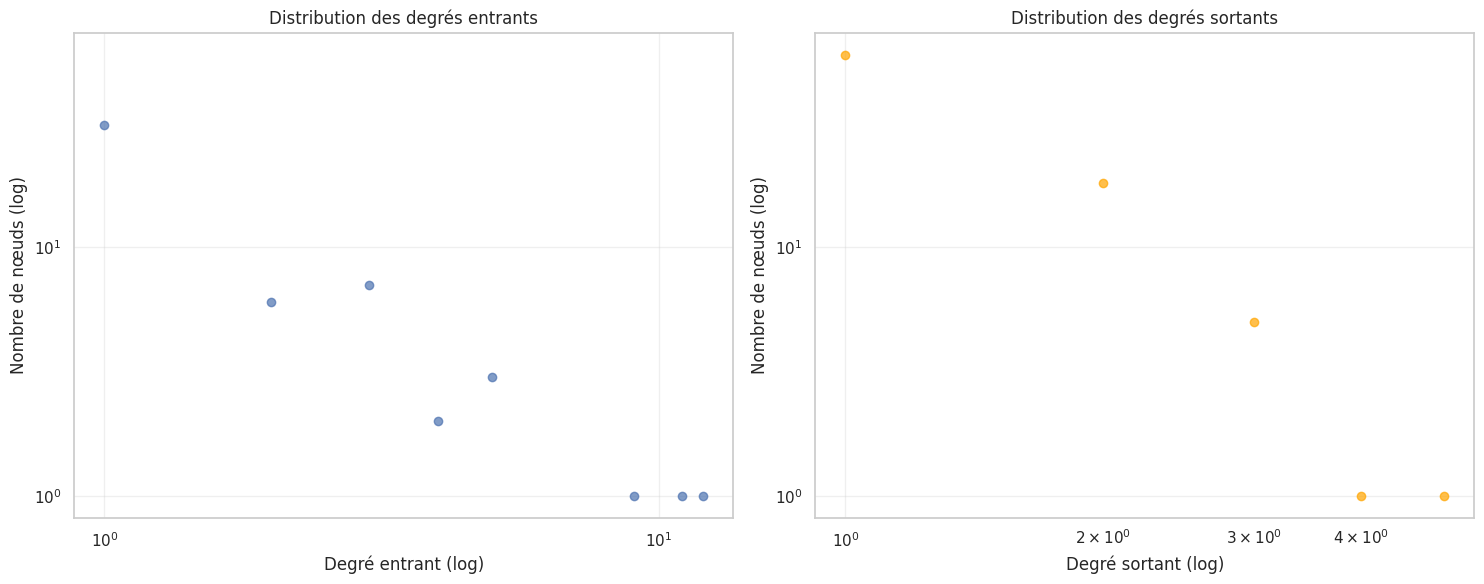

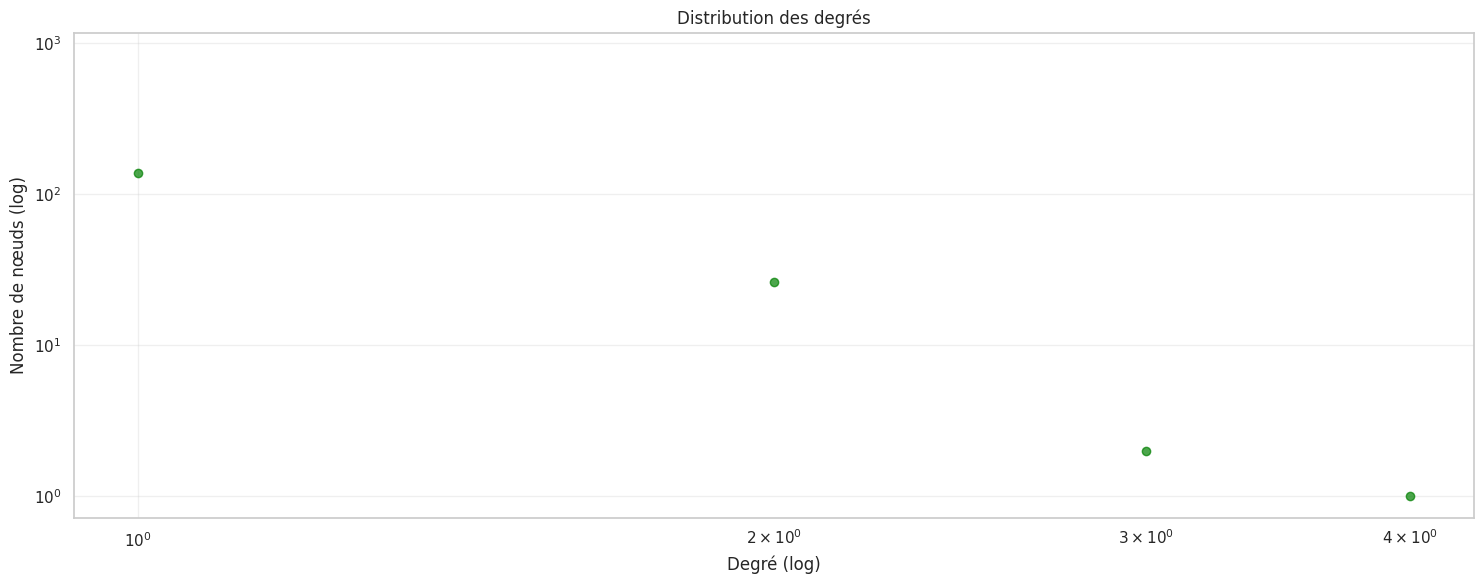

Visualisation du graphe de citation...
Le graphe est trop grand pour être visualisé entièrement.
Extraction de la composante connexe principale...
Sous-graphe créé avec 111 nœuds et 119 arêtes.
Calcul du layout...
Dessin des nœuds...
Dessin des arêtes...


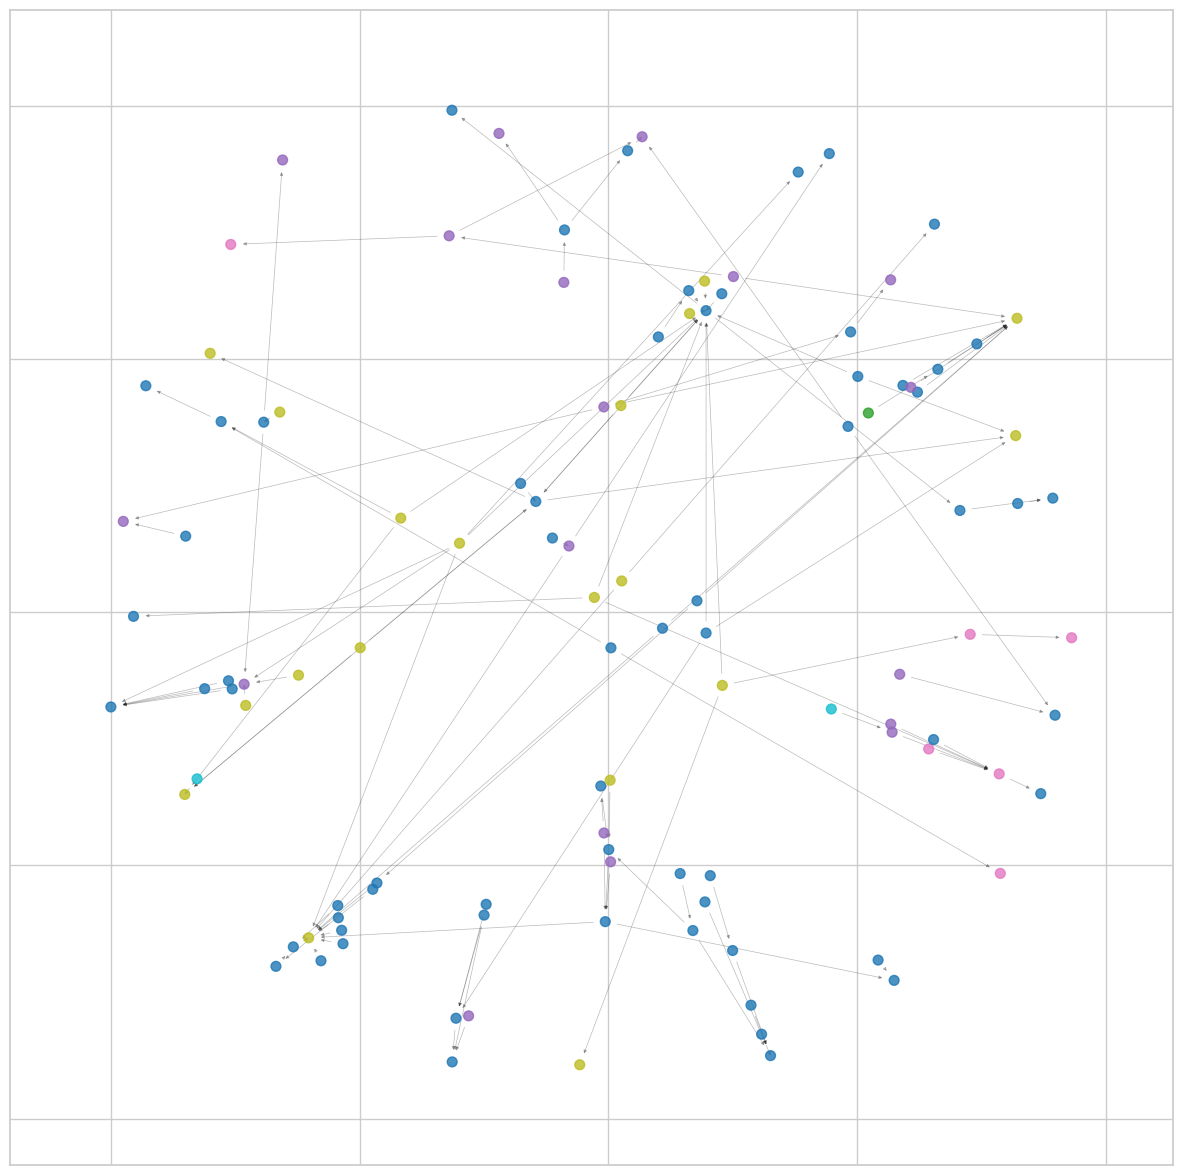

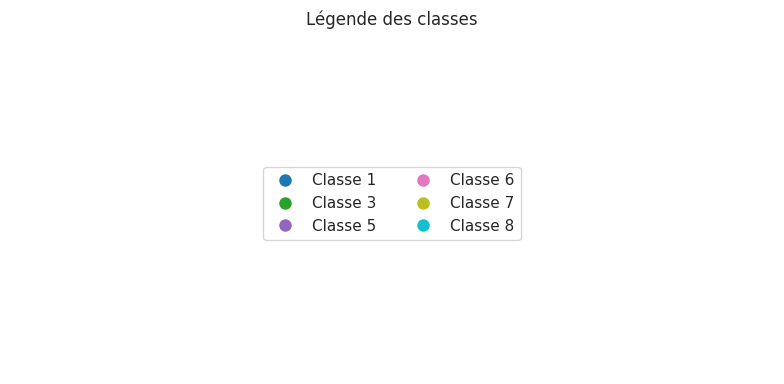

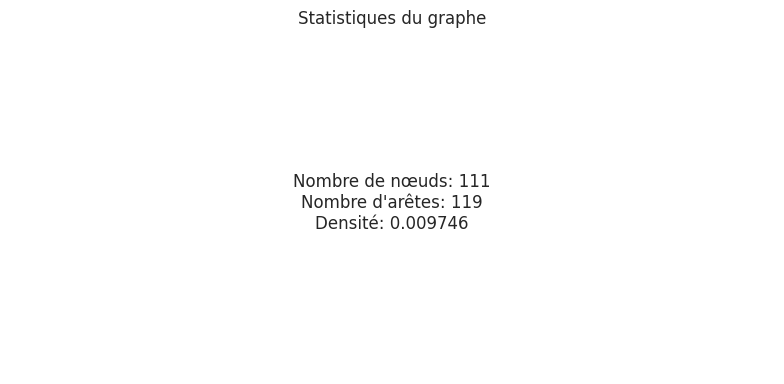

Visualisation du graphe de co-autorat...
Le graphe est trop grand pour être visualisé entièrement.
Extraction de la composante connexe principale...
La composante principale est encore trop grande (26700 nœuds).
Échantillonnage aléatoire de 500 nœuds...
Sous-graphe créé avec 500 nœuds et 25 arêtes.
Détection de communautés...
Erreur lors de la visualisation avec communautés: module 'community' has no attribute 'best_partition'


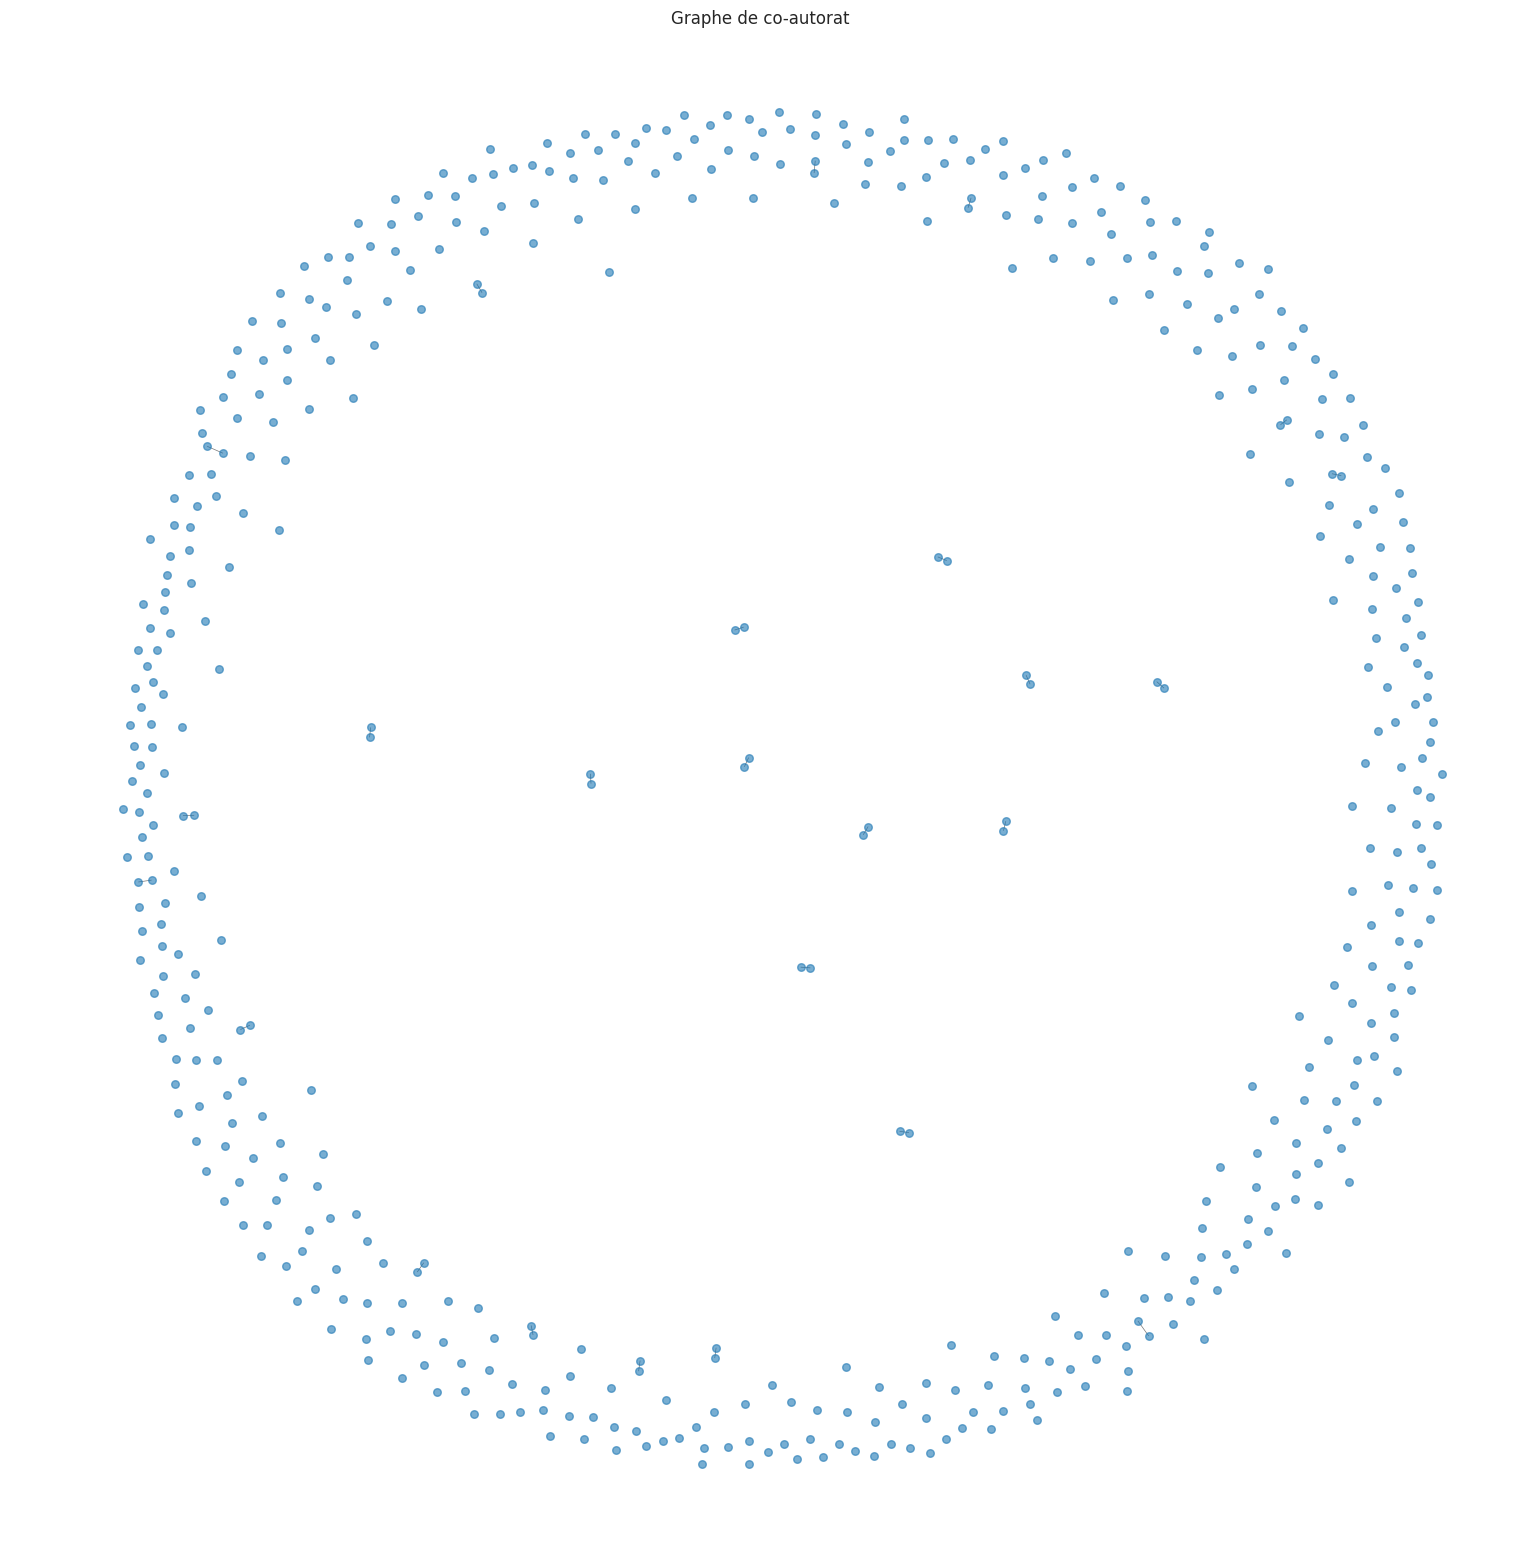

In [ ]:
# 4. Visualisations
visualize_degree_distributions(citation_stats, "citation")
visualize_degree_distributions(coauthorship_stats, "coauthorship")
visualize_citation_graph(citation_graph, df)
visualize_coauthorship_graph(coauthorship_graph)

# Moteur de recherche

In [ ]:
# Téléchargement des ressources NLTK nécessaires (à exécuter une seule fois)
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# 1. Préparation des données textuelles
def preprocess_text(text):
    """
    Prétraite le texte: normalisation, suppression des stopwords, stemming.

    Args:
        text (str): Texte à prétraiter

    Returns:
        str: Texte prétraité
    """
    if not isinstance(text, str):
        return ""

    # Conversion en minuscules
    text = text.lower()

    # Suppression des caractères spéciaux
    text = re.sub(r'[^\w\s]', ' ', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Suppression des stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Rejoindre les tokens
    return ' '.join(tokens)

def prepare_corpus_text(df):
    """
    Prépare et combine le texte des documents du corpus.

    Args:
        df (pd.DataFrame): DataFrame contenant les documents

    Returns:
        pd.Series: Série contenant le texte prétraité pour chaque document
    """
    print("Préparation du texte des documents...")

    # Créer une série pour stocker le texte combiné de chaque document
    document_texts = pd.Series(index=df.index, dtype='object')

    # Combiner le titre et le résumé pour chaque document
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        title = row['title'] if isinstance(row.get('title'), str) else ""
        abstract = row['abstract'] if isinstance(row.get('abstract'), str) else ""

        # Donner plus de poids au titre en le répétant
        combined_text = title + " " + title + " " + abstract
        document_texts[idx] = preprocess_text(combined_text)

    return document_texts

# 2. Indexation avec TF-IDF
def build_tfidf_index(document_texts):
    """
    Construit un index TF-IDF pour les documents.

    Args:
        document_texts (pd.Series): Série contenant le texte prétraité des documents

    Returns:
        tuple: (vectorizer, tfidf_matrix) - Le vectoriseur TF-IDF et la matrice de documents
    """
    print("Construction de l'index TF-IDF...")

    # Initialiser le vectoriseur TF-IDF
    vectorizer = TfidfVectorizer(min_df=2, max_df=0.9)

    # Calculer la matrice TF-IDF
    tfidf_matrix = vectorizer.fit_transform(document_texts)

    print(f"Matrice TF-IDF construite avec {tfidf_matrix.shape[0]} documents et {tfidf_matrix.shape[1]} termes.")

    return vectorizer, tfidf_matrix

# 3. Recherche basée sur TF-IDF
def tfidf_search(query, vectorizer, tfidf_matrix, df, top_n=10):
    """
    Effectue une recherche basée sur TF-IDF.

    Args:
        query (str): Requête de recherche
        vectorizer (TfidfVectorizer): Vectoriseur TF-IDF
        tfidf_matrix (scipy.sparse): Matrice TF-IDF des documents
        df (pd.DataFrame): DataFrame contenant les documents
        top_n (int): Nombre de résultats à retourner

    Returns:
        pd.DataFrame: DataFrame contenant les résultats de recherche
    """
    # Prétraiter la requête
    processed_query = preprocess_text(query)

    # Transformer la requête en vecteur TF-IDF
    query_vector = vectorizer.transform([processed_query])

    # Calculer la similarité cosinus entre la requête et tous les documents
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # Trier les documents par similarité décroissante
    document_scores = [(i, score) for i, score in enumerate(cosine_similarities)]
    document_scores.sort(key=lambda x: x[1], reverse=True)

    # Extraire les documents les plus pertinents
    top_documents = [(df.iloc[i]['id'], df.iloc[i]['title'], score)
                     for i, score in document_scores[:top_n]]

    # Créer un DataFrame avec les résultats
    results_df = pd.DataFrame(top_documents, columns=['id', 'title', 'relevance_score'])

    return results_df

# 4. Indexation avec Sentence-BERT
def build_sbert_index(document_texts, df):
    """
    Construit un index d'embeddings avec Sentence-BERT.

    Args:
        document_texts (pd.Series): Série contenant le texte des documents
        df (pd.DataFrame): DataFrame contenant les documents

    Returns:
        tuple: (model, embeddings) - Le modèle SBERT et les embeddings des documents
    """
    print("Construction de l'index Sentence-BERT...")

    # Charger le modèle SBERT
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

    # Calculer les embeddings pour tous les documents
    corpus_embeddings = []

    batch_size = 32
    for i in tqdm(range(0, len(document_texts), batch_size)):
        batch_texts = document_texts.iloc[i:i+batch_size].tolist()
        batch_embeddings = model.encode(batch_texts, show_progress_bar=False)
        corpus_embeddings.extend(batch_embeddings)

    # Convertir en array numpy
    corpus_embeddings = np.array(corpus_embeddings)

    print(f"Embeddings SBERT calculés. Dimension: {corpus_embeddings.shape}")

    return model, corpus_embeddings

# 5. Recherche basée sur Sentence-BERT
def sbert_search(query, model, corpus_embeddings, df, top_n=10):
    """
    Effectue une recherche sémantique basée sur Sentence-BERT.

    Args:
        query (str): Requête de recherche
        model (SentenceTransformer): Modèle SBERT
        corpus_embeddings (np.array): Embeddings des documents
        df (pd.DataFrame): DataFrame contenant les documents
        top_n (int): Nombre de résultats à retourner

    Returns:
        pd.DataFrame: DataFrame contenant les résultats de recherche
    """
    # Calculer l'embedding de la requête
    query_embedding = model.encode([query])[0]

    # Calculer la similarité cosinus entre la requête et tous les documents
    cosine_similarities = cosine_similarity([query_embedding], corpus_embeddings).flatten()

    # Trier les documents par similarité décroissante
    document_scores = [(i, score) for i, score in enumerate(cosine_similarities)]
    document_scores.sort(key=lambda x: x[1], reverse=True)

    # Extraire les documents les plus pertinents
    top_documents = [(df.iloc[i]['id'], df.iloc[i]['title'], score)
                     for i, score in document_scores[:top_n]]

    # Créer un DataFrame avec les résultats
    results_df = pd.DataFrame(top_documents, columns=['id', 'title', 'relevance_score'])

    return results_df

# 6. Construction du graphe pour l'indexation hybride
def build_citation_graph(df):
    """
    Construit un graphe de citation pour l'indexation hybride.

    Args:
        df (pd.DataFrame): DataFrame contenant les documents

    Returns:
        nx.DiGraph: Graphe de citation
    """
    print("Construction du graphe de citation...")

    G = nx.DiGraph()

    # Ajouter tous les documents comme nœuds
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        G.add_node(row['id'],
                   title=row['title'],
                   year=row.get('year', 0),
                   class_id=row.get('class', 0))

    # Ajouter les liens de citation
    edges_added = 0
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        source_id = row['id']
        for ref_id in row.get('references', []):
            if G.has_node(ref_id):  # Vérifier si la référence existe dans notre graphe
                G.add_edge(source_id, ref_id)
                edges_added += 1

    print(f"Graphe de citation construit avec {G.number_of_nodes()} nœuds et {G.number_of_edges()} arêtes.")

    return G

# 7. Génération d'embeddings de graphe avec Node2Vec
def generate_graph_embeddings(G):
    """
    Génère des embeddings de nœuds avec Node2Vec de manière plus robuste.

    Args:
        G (nx.Graph): Graphe de citation

    Returns:
        dict: Dictionnaire des embeddings de nœuds
    """
    print("Génération des embeddings de graphe avec Node2Vec...")

    # Convertir les nœuds en chaînes pour éviter les problèmes de type
    if len(G.nodes()) > 0:
        # Vérifier si les nœuds sont déjà des chaînes
        is_str = all(isinstance(node, str) for node in list(G.nodes())[:10])

        if not is_str:
            print("Conversion des identifiants de nœuds en chaînes...")
            # Créer un nouveau graphe avec des nœuds sous forme de chaînes
            G_str = nx.DiGraph()

            # Copier les nœuds avec leurs attributs
            for node, attrs in G.nodes(data=True):
                G_str.add_node(str(node), **attrs)

            # Copier les arêtes
            for u, v, attrs in G.edges(data=True):
                G_str.add_edge(str(u), str(v), **attrs)

            G = G_str
            print(f"Graphe converti avec {G.number_of_nodes()} nœuds et {G.number_of_edges()} arêtes.")

    # Vérifier si le graphe a assez de nœuds et d'arêtes pour Node2Vec
    if G.number_of_nodes() < 2 or G.number_of_edges() < 1:
        print("Le graphe est trop petit pour Node2Vec. Retour d'un dictionnaire vide.")
        return {}

    try:
        # Initialiser Node2Vec avec des paramètres plus robustes
        node2vec = Node2Vec(G,
                            dimensions=64,     # Dimension des embeddings
                            walk_length=10,    # Longueur des marches aléatoires
                            num_walks=20,      # Nombre de marches par nœud (réduit pour la vitesse)
                            workers=4,         # Nombre de threads parallèles
                            quiet=True)        # Réduire les messages de debug

        # Entraîner le modèle avec des paramètres adaptés
        model = node2vec.fit(window=5,        # Contexte pour Skip-gram (réduit)
                            min_count=1,      # Ignorer les nœuds avec moins d'occurrences
                            batch_words=4,    # Taille du batch
                            epochs=5)         # Moins d'époques pour la vitesse

        # Extraire les embeddings de manière sécurisée
        node_embeddings = {}
        for node in G.nodes():
            try:
                # Vérifier si le nœud est dans le vocabulaire du modèle
                if node in model.wv:
                    node_embeddings[node] = model.wv[node]
            except Exception as e:
                print(f"Impossible d'obtenir l'embedding pour le nœud {node}: {e}")
                continue

        print(f"Embeddings de graphe générés pour {len(node_embeddings)} nœuds sur {G.number_of_nodes()}.")

        return node_embeddings

    except Exception as e:
        print(f"Erreur lors de la génération des embeddings: {e}")
        print("Utilisation d'une méthode alternative plus simple...")

        # Méthode alternative: créer des embeddings simples basés sur les degrés
        node_embeddings = {}
        for node in G.nodes():
            # Créer un vecteur simple basé sur le degré entrant et sortant
            in_degree = G.in_degree(node)
            out_degree = G.out_degree(node)

            # Créer un vecteur de 64 dimensions rempli de valeurs aléatoires mais déterministes
            # basées sur les degrés (pour avoir une forme compatible avec l'embedding attendu)
            np.random.seed(in_degree + out_degree * 1000)
            embedding = np.random.normal(size=64)
            embedding[0] = in_degree / (G.number_of_nodes() + 1)  # Normaliser
            embedding[1] = out_degree / (G.number_of_nodes() + 1)  # Normaliser

            node_embeddings[node] = embedding

        print(f"Embeddings alternatifs générés pour {len(node_embeddings)} nœuds.")
        return node_embeddings

# 8. Recherche hybride (texte + graphe)
def hybrid_search(query, model, corpus_embeddings, node_embeddings, df, alpha=0.7, top_n=10):
    """
    Effectue une recherche hybride combinant similarité sémantique et structure du graphe.

    Args:
        query (str): Requête de recherche
        model (SentenceTransformer): Modèle SBERT
        corpus_embeddings (np.array): Embeddings textuels des documents
        node_embeddings (dict): Embeddings des nœuds du graphe
        df (pd.DataFrame): DataFrame contenant les documents
        alpha (float): Poids de la similarité sémantique (1-alpha = poids du graphe)
        top_n (int): Nombre de résultats à retourner

    Returns:
        pd.DataFrame: DataFrame contenant les résultats de recherche
    """
    # Calculer l'embedding de la requête
    query_embedding = model.encode([query])[0]

    # Calculer la similarité cosinus entre la requête et tous les documents
    semantic_similarities = cosine_similarity([query_embedding], corpus_embeddings).flatten()

    # Initialiser les scores hybrides avec les scores sémantiques
    hybrid_scores = alpha * semantic_similarities

    if alpha < 1.0:
        # Obtenir les top N documents basés sur la similarité sémantique
        initial_candidates = np.argsort(semantic_similarities)[-top_n*3:][::-1]

        # Pour chaque candidat, calculer le score basé sur le graphe
        for i in initial_candidates:
            doc_id = df.iloc[i]['id']

            if doc_id in node_embeddings:
                doc_embedding = node_embeddings[doc_id]

                # Calculer la similarité moyenne avec d'autres documents bien classés
                graph_similarity = 0.0
                count = 0

                for j in initial_candidates:
                    if i != j:
                        other_id = df.iloc[j]['id']
                        if other_id in node_embeddings:
                            other_embedding = node_embeddings[other_id]
                            # Similarité cosinus entre les embeddings de graphe
                            sim = cosine_similarity([doc_embedding], [other_embedding])[0][0]
                            graph_similarity += sim
                            count += 1

                if count > 0:
                    graph_similarity /= count
                    # Mettre à jour le score hybride avec la composante graphe
                    hybrid_scores[i] += (1 - alpha) * graph_similarity

    # Trier les documents par score hybride décroissant
    document_scores = [(i, score) for i, score in enumerate(hybrid_scores)]
    document_scores.sort(key=lambda x: x[1], reverse=True)

    # Extraire les documents les plus pertinents
    top_documents = [(df.iloc[i]['id'], df.iloc[i]['title'], score)
                     for i, score in document_scores[:top_n]]

    # Créer un DataFrame avec les résultats
    results_df = pd.DataFrame(top_documents, columns=['id', 'title', 'relevance_score'])

    return results_df

# 9. Interface utilisateur pour la recherche
def search_ui(query, search_methods, df):
    """
    Interface pour effectuer une recherche avec différentes méthodes.

    Args:
        query (str): Requête de recherche
        search_methods (dict): Dictionnaire des méthodes de recherche disponibles
        df (pd.DataFrame): DataFrame contenant les documents

    Returns:
        dict: Résultats de recherche pour chaque méthode
    """
    # Valider la requête
    if not query or not isinstance(query, str):
        print("Veuillez entrer une requête valide.")
        return None

    print(f"Recherche pour: '{query}'")

    # Effectuer la recherche avec chaque méthode
    results = {}
    for method_name, method_func in search_methods.items():
        print(f"\nMéthode: {method_name}")
        method_results = method_func(query)
        results[method_name] = method_results

        # Afficher les résultats
        print(f"Top {len(method_results)} résultats:")
        for i, (_, row) in enumerate(method_results.iterrows()):
            print(f"{i+1}. {row['title']} (score: {row['relevance_score']:.4f})")

    return results

# 10. Visualisation des résultats de recherche
# Version corrigée de la visualisation des résultats
def visualize_search_results(results, query):
    """
    Visualise les résultats de recherche pour comparer les différentes méthodes.
    Version corrigée qui gère correctement les types de données.

    Args:
        results (dict): Résultats de recherche pour chaque méthode
        query (str): Requête de recherche
    """
    try:
        # Nombre de méthodes
        n_methods = len(results)

        # Extraire les titres uniques de tous les résultats
        all_titles = set()
        for method_results in results.values():
            all_titles.update(method_results['title'])

        # Limiter le nombre de titres pour la visualisation
        max_titles = 15
        if len(all_titles) > max_titles:
            # Prioriser les titres qui apparaissent dans plusieurs méthodes
            title_counts = {}
            for method_results in results.values():
                for title in method_results['title']:
                    title_counts[title] = title_counts.get(title, 0) + 1

            # Sélectionner les titres les plus fréquents
            all_titles = sorted(title_counts.keys(), key=lambda x: title_counts[x], reverse=True)[:max_titles]

        # Créer un DataFrame pour la visualisation
        viz_data = pd.DataFrame(index=list(all_titles))

        # Remplir le DataFrame avec les scores pour chaque méthode
        for method_name, method_results in results.items():
            # Initialiser une colonne pour cette méthode avec des zéros
            viz_data[method_name] = 0.0

            # Remplir avec les scores disponibles
            for _, row in method_results.iterrows():
                if row['title'] in viz_data.index:
                    try:
                        viz_data.at[row['title'], method_name] = float(row['relevance_score'])
                    except (ValueError, TypeError):
                        print(f"AVERTISSEMENT: Impossible de convertir le score '{row['relevance_score']}' en flottant. Utilisation de 0.")
                        viz_data.at[row['title'], method_name] = 0.0

        # Normaliser les scores pour chaque méthode
        for method in viz_data.columns:
            max_score = viz_data[method].max()
            if max_score > 0:
                viz_data[method] = viz_data[method] / max_score

        # Créer un heatmap
        plt.figure(figsize=(10, max(8, len(all_titles) * 0.4)))
        sns.heatmap(viz_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
        plt.title(f"Comparaison des résultats de recherche pour '{query}'")
        plt.ylabel('Document')
        plt.xlabel('Méthode de recherche')
        plt.tight_layout()
        plt.show()

        # Visualisation de l'accord entre méthodes
        plt.figure(figsize=(10, 8))

        # Calculer l'accord entre les paires de méthodes
        agreement = pd.DataFrame(index=list(results.keys()), columns=list(results.keys()))

        for m1 in results.keys():
            for m2 in results.keys():
                # Extraire les titres des résultats pour chaque méthode
                titles_m1 = set(results[m1]['title'])
                titles_m2 = set(results[m2]['title'])

                # Calculer le coefficient de Jaccard
                intersection = len(titles_m1.intersection(titles_m2))
                union = len(titles_m1.union(titles_m2))
                jaccard = intersection / union if union > 0 else 0

                agreement.at[m1, m2] = float(jaccard)

        # Créer un heatmap de l'accord
        sns.heatmap(agreement, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
        plt.title(f"Accord entre les méthodes de recherche pour '{query}'")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Erreur lors de la visualisation: {e}")
        print("Utilisation de la visualisation alternative...")
        visualize_search_results_alternative(results, query)

def visualize_search_results_alternative(results, query):
    """
    Visualisation alternative basée sur des tableaux et des graphiques à barres.
    Utilisée en cas d'échec de la visualisation principale.
    """
    print(f"\n==== Résultats de recherche pour: '{query}' ====\n")

    # Extraire les titres uniques de tous les résultats
    all_titles = set()
    for method_results in results.values():
        all_titles.update(method_results['title'])

    # Limiter le nombre de titres pour l'affichage
    max_titles = 15
    if len(all_titles) > max_titles:
        # Prioriser les titres qui apparaissent dans plusieurs méthodes
        title_counts = {}
        for method_results in results.values():
            for title in method_results['title']:
                title_counts[title] = title_counts.get(title, 0) + 1

        # Sélectionner les titres les plus fréquents
        all_titles = sorted(title_counts.keys(), key=lambda x: title_counts[x], reverse=True)[:max_titles]

    # Créer un DataFrame pour l'affichage
    viz_data = pd.DataFrame(index=list(all_titles))

    # Remplir le DataFrame avec les scores pour chaque méthode
    for method_name, method_results in results.items():
        # Initialiser une colonne pour cette méthode
        viz_data[method_name] = "-"

        # Remplir avec les scores disponibles
        for _, row in method_results.iterrows():
            if row['title'] in viz_data.index:
                try:
                    viz_data.at[row['title'], method_name] = f"{float(row['relevance_score']):.4f}"
                except:
                    viz_data.at[row['title'], method_name] = str(row['relevance_score'])

    # Afficher le tableau des résultats
    print("Comparaison des scores de pertinence:")
    display(viz_data)

    # Créer un simple graphique à barres pour l'accord entre méthodes
    plt.figure(figsize=(10, 6))

    # Calculer l'accord entre les paires de méthodes
    method_names = list(results.keys())
    comparisons = []
    jaccard_scores = []

    for i, m1 in enumerate(method_names):
        for j, m2 in enumerate(method_names):
            if i < j:  # Éviter les doublons et les comparaisons d'une méthode avec elle-même
                # Extraire les titres des résultats pour chaque méthode
                titles_m1 = set(results[m1]['title'])
                titles_m2 = set(results[m2]['title'])

                # Calculer le coefficient de Jaccard
                intersection = len(titles_m1.intersection(titles_m2))
                union = len(titles_m1.union(titles_m2))
                jaccard = intersection / union if union > 0 else 0

                comparisons.append(f"{m1} vs {m2}")
                jaccard_scores.append(jaccard)

    # Créer un graphique à barres
    plt.bar(comparisons, jaccard_scores, color='skyblue')
    plt.title(f"Accord entre les méthodes de recherche pour '{query}'")
    plt.ylabel('Coefficient de Jaccard')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Afficher un résumé textuel
    print("\nRésumé de l'accord entre méthodes:")
    for i, comp in enumerate(comparisons):
        print(f"{comp}: {jaccard_scores[i]:.2f}")

# Interface utilisateur pour la recherche interactive
def interactive_search():
    """
    Interface interactive pour effectuer des recherches.
    """
    print("\nRecherche interactive. Tapez 'q' pour quitter.")

    while True:
        query = input("\nEntrez votre requête: ")
        if query.lower() == 'q':
            break

        if not query.strip():
            print("Requête vide. Veuillez entrer une requête valide.")
            continue

        results = search_ui(query, search_methods, df)
        if results:
            visualize_search_results(results, query)



In [ ]:
# Chargement des données (utiliser le DataFrame nettoyé de la partie 1)
try:
    with open('corpus_processed.pkl', 'rb') as f:
        df = pickle.load(f)
    print(f"Données chargées depuis corpus_processed.pkl. Shape: {df.shape}")
except FileNotFoundError:
    # Si le fichier n'existe pas, chargez-le à partir du fichier TSV original
    file_path = "votre_fichier.tsv"  # Remplacez par le chemin réel
    df = pd.read_csv(file_path, sep='\t', quoting=3, encoding='utf-8')
    print(f"Données chargées depuis {file_path}. Shape: {df.shape}")

    # Nettoyage minimal des données si nécessaire
    import ast
    def safe_literal_eval(val):
        if not isinstance(val, str):
            return []
        if val.startswith('[') and val.endswith(']'):
            try:
                return ast.literal_eval(val)
            except (ValueError, SyntaxError):
                return []
        return []

    # Applique le nettoyage minimal
    if 'authors' in df.columns:
        df['authors'] = df['authors'].apply(lambda x: safe_literal_eval(x) if isinstance(x, str) else [])
    if 'references' in df.columns:
        df['references'] = df['references'].apply(lambda x: safe_literal_eval(x) if isinstance(x, str) else [])

# Afficher les premières lignes pour vérification
print("\nAperçu des données:")
display(df.head())

Données chargées depuis corpus_processed.pkl. Shape: (40597, 9)

Aperçu des données:


,venue,abstract,authors,n_citation,references,title,year,id,class
0,international conference on human-computer int...,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,2013,00127ee2-cb05-48ce-bc49-9de556b93346,3
1,visual analytics science and technology,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821,3
2,pattern recognition and machine intelligence,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",2009,001c8744-73c4-4b04-9364-22d31a10dbf1,4
3,international conference on computer graphics ...,,"[Rafael Álvarez, Leandro Tortosa, José-Francis...",0,[],COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009,005ce28f-ed77-4e97-afdc-a296137186a1,5
4,international symposium on computer and inform...,,"[Guzin Ulutas, Mustafa Ulutas, Vasif V. Nabiyev]",0,"[5626736c-e434-4e2d-8405-54940fab88ab, 8e87e87...",Improved Secret Image Sharing Method By Encodi...,2011,00701b05-684f-45f9-b281-425abfec482c,8


In [ ]:
# 1. Préparer le texte du corpus
document_texts = prepare_corpus_text(df)

Préparation du texte des documents...


  0%|          | 0/40597 [00:00<?, ?it/s]

In [ ]:
# 2. Construire l'index TF-IDF
vectorizer, tfidf_matrix = build_tfidf_index(document_texts)


Construction de l'index TF-IDF...
Matrice TF-IDF construite avec 40597 documents et 17414 termes.


In [ ]:
# 3. Construire l'index SBERT
model, corpus_embeddings = build_sbert_index(document_texts, df)


Construction de l'index Sentence-BERT...


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

  0%|          | 0/1269 [00:00<?, ?it/s]

Embeddings SBERT calculés. Dimension: (40597, 384)


In [ ]:
# 4. Construire le graphe et générer les embeddings
citation_graph = build_citation_graph(df)

Construction du graphe de citation...


  0%|          | 0/40597 [00:00<?, ?it/s]

  0%|          | 0/40597 [00:00<?, ?it/s]

Graphe de citation construit avec 40597 nœuds et 3641 arêtes.


In [ ]:
node_embeddings = generate_graph_embeddings(citation_graph)

Génération des embeddings de graphe avec Node2Vec...
Embeddings de graphe générés pour 40596 nœuds sur 40597.


In [ ]:
# 5. Définir les fonctions de recherche
search_methods = {
    "TF-IDF": lambda q: tfidf_search(q, vectorizer, tfidf_matrix, df),
    "Sentence-BERT": lambda q: sbert_search(q, model, corpus_embeddings, df),
    "Hybride (Texte + Graphe)": lambda q: hybrid_search(q, model, corpus_embeddings, node_embeddings, df)
}

In [ ]:
# 6. Interface de recherche interactive
def interactive_search():
    while True:
        query = input("\nEntrez votre requête (ou 'q' pour quitter): ")
        if query.lower() == 'q':
            break

        results = search_ui(query, search_methods, df)
        if results:
            visualize_search_results(results, query)



Entrez votre requête (ou 'q' pour quitter): gnn
Recherche pour: 'gnn'

Méthode: TF-IDF
Top 10 résultats:
1. Preliminary Design of a Network Protocol Learning Tool Based on the Comprehension of High School Students: Design by an Empirical Study Using a Simple Mind Map (score: 0.0000)
2. A methodology for the physically accurate visualisation of roman polychrome statuary (score: 0.0000)
3. Comparison of GARCH, Neural Network and Support Vector Machine in Financial Time Series Prediction (score: 0.0000)
4. COMPARING GNG3D AND QUADRIC ERROR METRICS METHODS TO SIMPLIFY 3D MESHES (score: 0.0000)
5. Improved Secret Image Sharing Method By Encoding Shared Values With Authentication Bits (score: 0.0000)
6. A Self-Stabilizing Algorithm for Finding the Cutting Center of a Tree. (score: 0.0000)
7. Fur Visualisation for Computer Game Engines and Real-Time Rendering (score: 0.0000)
8. Multisymplectic Spectral Methods for the Gross-Pitaevskii Equation (score: 0.0000)
9. Speech training systems using

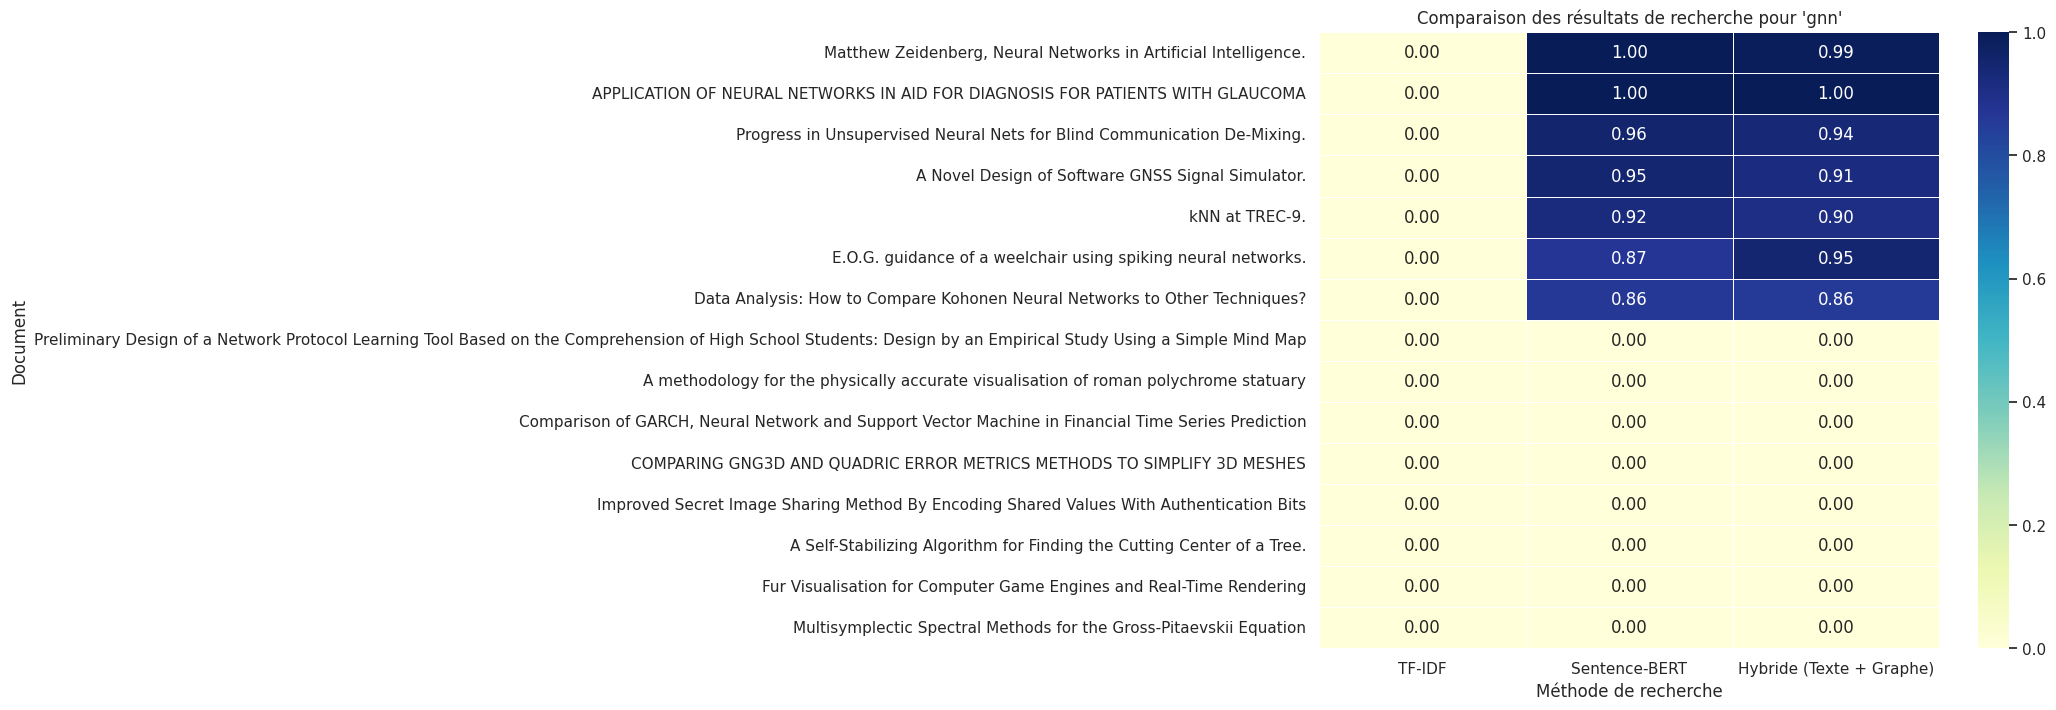

Erreur lors de la visualisation: Image data of dtype object cannot be converted to float
Utilisation de la visualisation alternative...

==== Résultats de recherche pour: 'gnn' ====

Comparaison des scores de pertinence:


,TF-IDF,Sentence-BERT,Hybride (Texte + Graphe)
"Matthew Zeidenberg, Neural Networks in Artificial Intelligence.",-,0.4735,0.3293
APPLICATION OF NEURAL NETWORKS IN AID FOR DIAGNOSIS FOR PATIENTS WITH GLAUCOMA,-,0.4723,0.3327
Progress in Unsupervised Neural Nets for Blind Communication De-Mixing.,-,0.4527,0.3116
A Novel Design of Software GNSS Signal Simulator.,-,0.4493,0.3043
kNN at TREC-9.,-,0.4347,0.3004
E.O.G. guidance of a weelchair using spiking neural networks.,-,0.4110,0.3155
Data Analysis: How to Compare Kohonen Neural Networks to Other Techniques?,-,0.4072,0.2852
Preliminary Design of a Network Protocol Learning Tool Based on the Comprehension of High School Students: Design by an Empirical Study Using a Simple Mind Map,0.0000,-,-
A methodology for the physically accurate visualisation of roman polychrome statuary,0.0000,-,-
"Comparison of GARCH, Neural Network and Support Vector Machine in Financial Time Series Prediction",0.0000,-,-


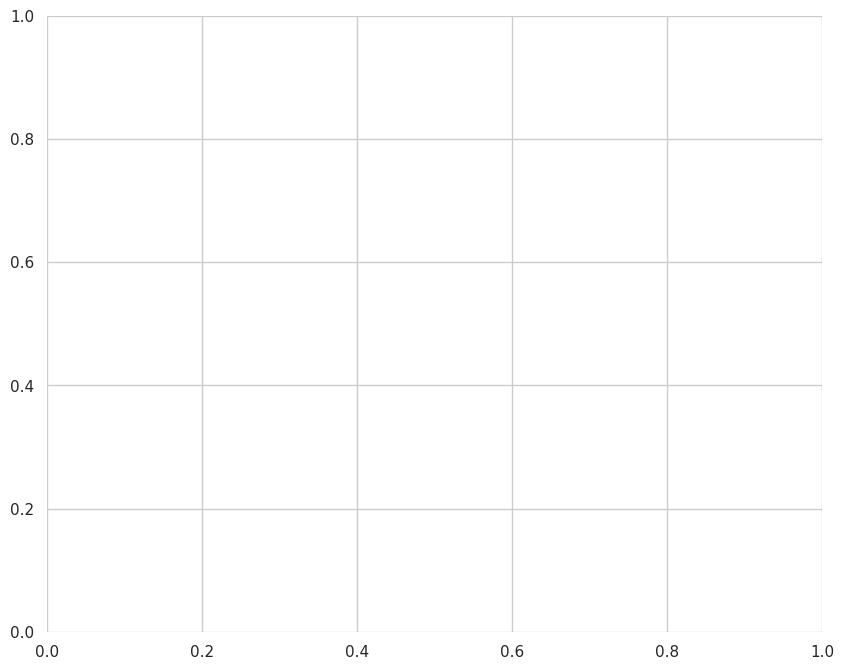

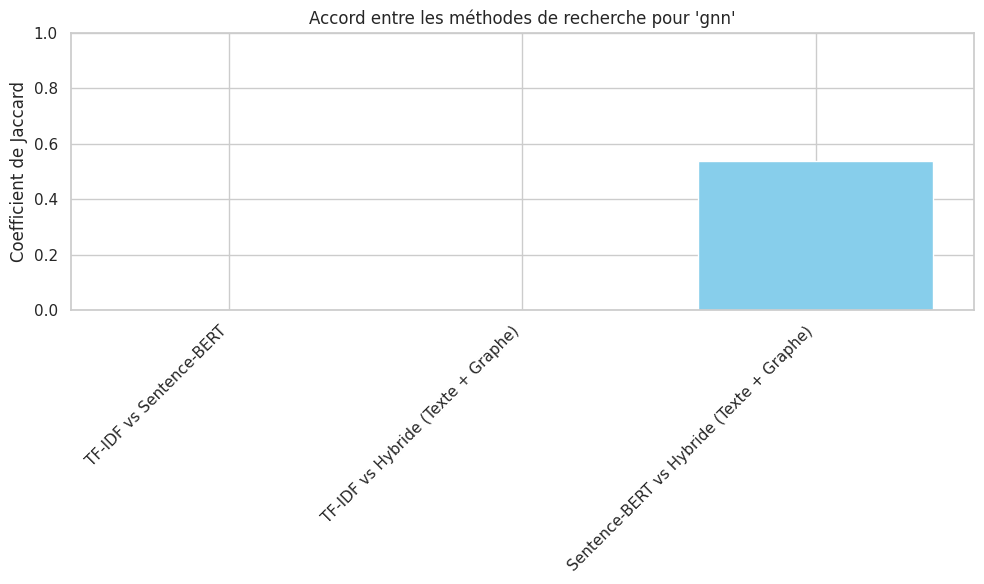


Résumé de l'accord entre méthodes:
TF-IDF vs Sentence-BERT: 0.00
TF-IDF vs Hybride (Texte + Graphe): 0.00
Sentence-BERT vs Hybride (Texte + Graphe): 0.54

Entrez votre requête (ou 'q' pour quitter): deep learning
Recherche pour: 'deep learning'

Méthode: TF-IDF
Top 10 résultats:
1. Deep Learning of Representations (score: 0.8649)
2. Information-Based Learning of Deep Architectures for Feature Extraction (score: 0.6771)
3. Modeling Video Dynamics with Deep Dynencoder (score: 0.6023)
4. Deep Web Navigation by Example. (score: 0.5454)
5. Domain Adaptation for Large-Scale Sentiment Classification: A Deep Learning Approach (score: 0.5251)
6. Index Structures for Querying the Deep Web. (score: 0.5245)
7. Assigning Deep Lexical Types (score: 0.5071)
8. Deep Features for Text Spotting (score: 0.5020)
9. Learning a Deep Convolutional Network for Image Super-Resolution (score: 0.4901)
10. Deep Set Operators for XQuery. (score: 0.4820)

Méthode: Sentence-BERT
Top 10 résultats:
1. Deep Learning o

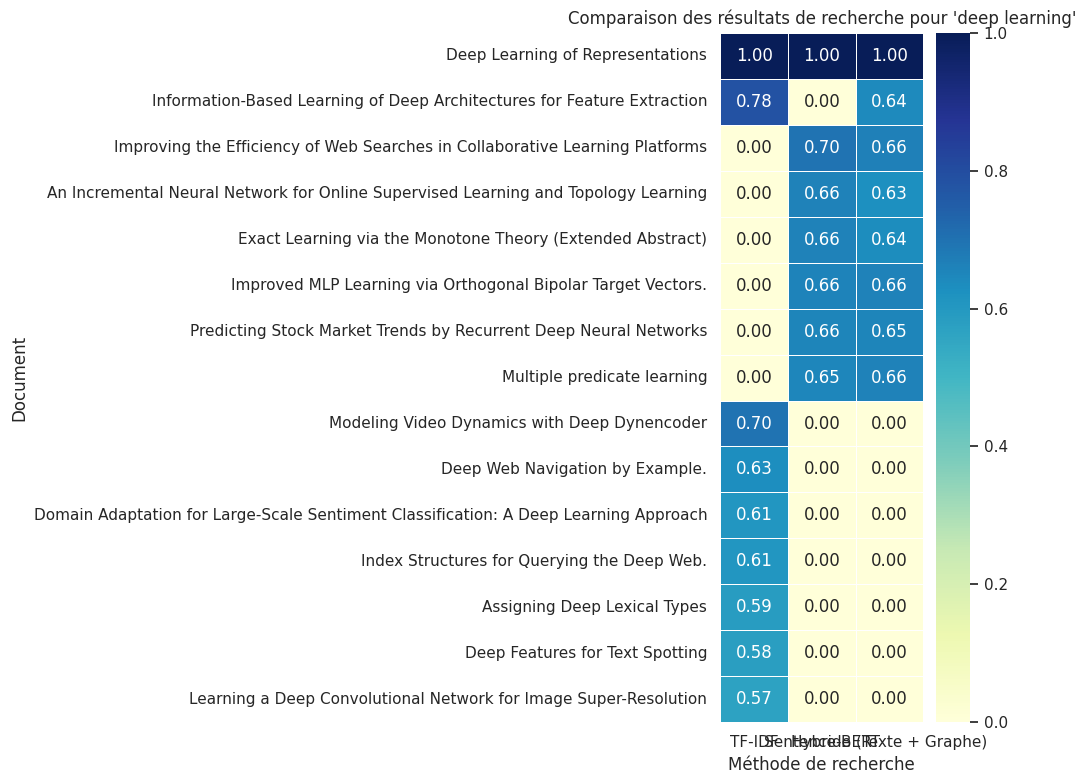

Erreur lors de la visualisation: Image data of dtype object cannot be converted to float
Utilisation de la visualisation alternative...

==== Résultats de recherche pour: 'deep learning' ====

Comparaison des scores de pertinence:


,TF-IDF,Sentence-BERT,Hybride (Texte + Graphe)
Deep Learning of Representations,0.8649,0.7540,0.5526
Information-Based Learning of Deep Architectures for Feature Extraction,0.6771,-,0.3556
Improving the Efficiency of Web Searches in Collaborative Learning Platforms,-,0.5260,0.3672
An Incremental Neural Network for Online Supervised Learning and Topology Learning,-,0.4989,0.3457
Exact Learning via the Monotone Theory (Extended Abstract),-,0.4982,0.3517
Improved MLP Learning via Orthogonal Bipolar Target Vectors.,-,0.4969,0.3667
Predicting Stock Market Trends by Recurrent Deep Neural Networks,-,0.4939,0.3614
Multiple predicate learning,-,0.4914,0.3665
Modeling Video Dynamics with Deep Dynencoder,0.6023,-,-
Deep Web Navigation by Example.,0.5454,-,-


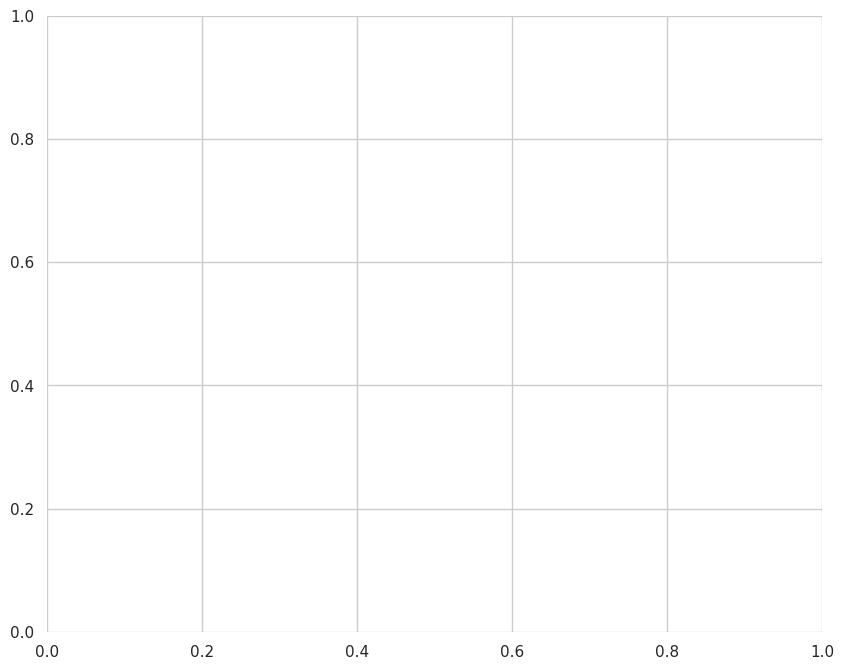

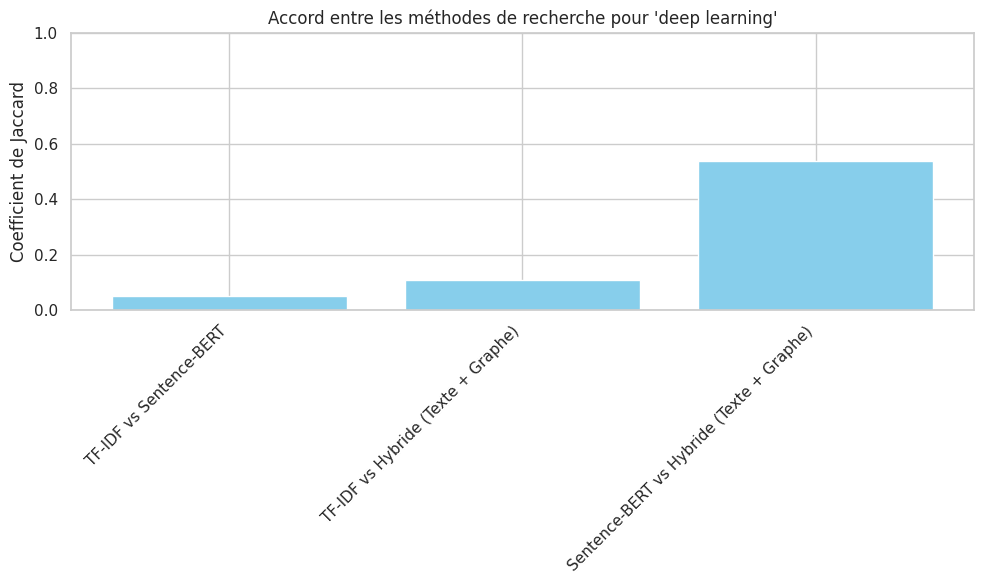


Résumé de l'accord entre méthodes:
TF-IDF vs Sentence-BERT: 0.05
TF-IDF vs Hybride (Texte + Graphe): 0.11
Sentence-BERT vs Hybride (Texte + Graphe): 0.54

Entrez votre requête (ou 'q' pour quitter): q


In [ ]:
# Lancer la recherche interactive
interactive_search()

Recherche pour: 'machine learning'

Méthode: TF-IDF
Top 10 résultats:
1. Machine learning and agents (score: 0.6766)
2. ASV monitor: creating comparability of machine learning methods for content analysis (score: 0.6311)
3. Sparse Representation for Machine Learning (score: 0.6127)
4. Visual Data Mining and Machine Learning. (score: 0.6076)
5. Machine Learning and Relevance Feedback. (score: 0.6040)
6. Learning Machine for Probabilistically Describable Concepts. (score: 0.5856)
7. A simple algorithm for learning stable machines (score: 0.5835)
8. Machine Learning for Information Extraction (score: 0.5593)
9. Using Machine Learning Methods to Improve Quality of Tagged Corpora and Learning Models. (score: 0.5573)
10. Machine Learning Approach for the Automatic Annotation of the Events. (score: 0.5314)

Méthode: Sentence-BERT
Top 10 résultats:
1. A Methodology for Learning Validation in Neural Cultures (score: 0.5405)
2. Program Equivalence Using Neural Networks (score: 0.5264)
3. Use of 

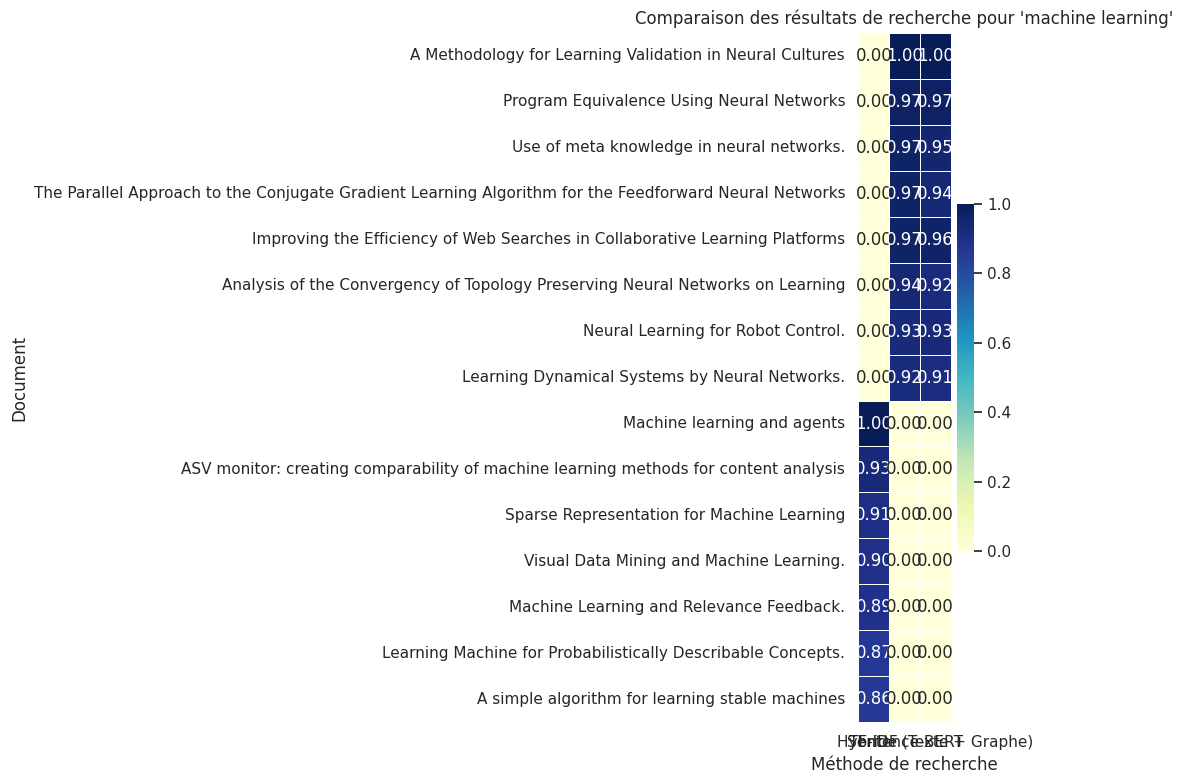

Erreur lors de la visualisation: Image data of dtype object cannot be converted to float
Utilisation de la visualisation alternative...

==== Résultats de recherche pour: 'machine learning' ====

Comparaison des scores de pertinence:


,TF-IDF,Sentence-BERT,Hybride (Texte + Graphe)
A Methodology for Learning Validation in Neural Cultures,-,0.5405,0.3812
Program Equivalence Using Neural Networks,-,0.5264,0.3714
Use of meta knowledge in neural networks.,-,0.5233,0.3627
The Parallel Approach to the Conjugate Gradient Learning Algorithm for the Feedforward Neural Networks,-,0.5230,0.3577
Improving the Efficiency of Web Searches in Collaborative Learning Platforms,-,0.5221,0.3670
Analysis of the Convergency of Topology Preserving Neural Networks on Learning,-,0.5079,0.3505
Neural Learning for Robot Control.,-,0.5023,0.3556
Learning Dynamical Systems by Neural Networks.,-,0.4985,0.3470
Machine learning and agents,0.6766,-,-
ASV monitor: creating comparability of machine learning methods for content analysis,0.6311,-,-


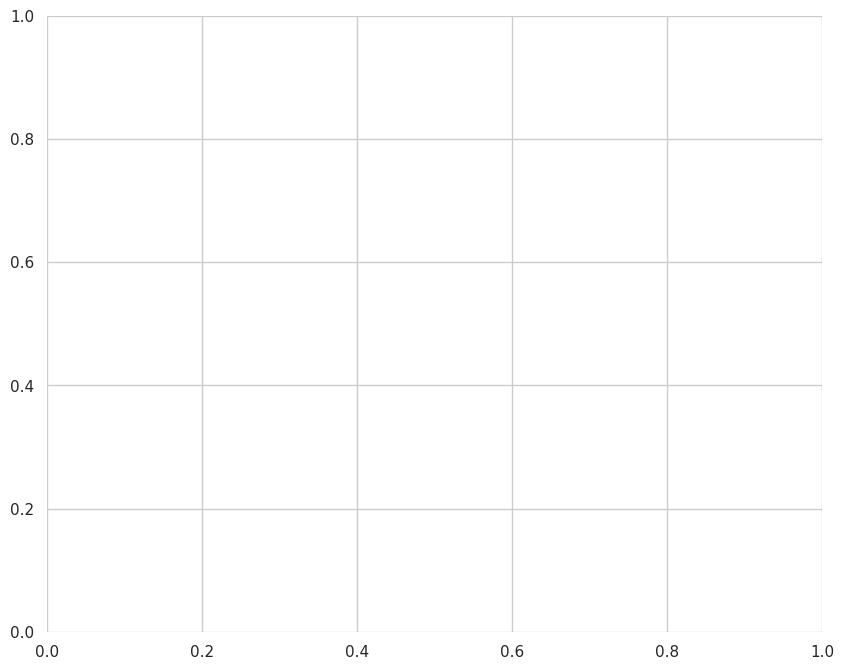

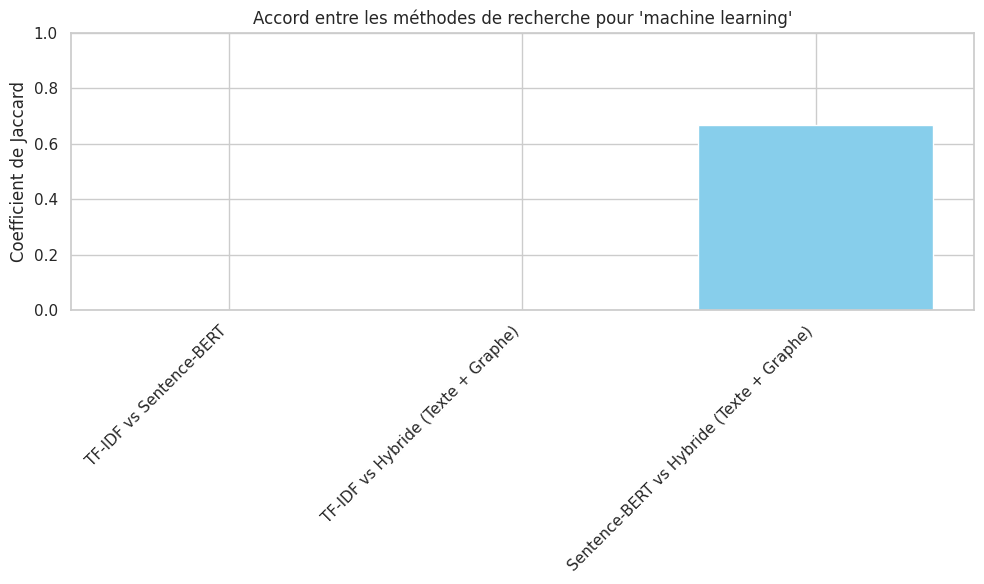


Résumé de l'accord entre méthodes:
TF-IDF vs Sentence-BERT: 0.00
TF-IDF vs Hybride (Texte + Graphe): 0.00
Sentence-BERT vs Hybride (Texte + Graphe): 0.67


In [ ]:
query = "machine learning"
results = search_ui(query, search_methods, df)
visualize_search_results(results, query)

# Clustering

In [ ]:
# 1. Préparation des données pour le clustering
def prepare_data_for_clustering(df, citation_graph=None):
    """
    Prépare les données pour différentes méthodes de clustering.

    Args:
        df (pd.DataFrame): DataFrame contenant les documents
        citation_graph (nx.Graph, optional): Graphe de citation préexistant

    Returns:
        tuple: (adjacency_matrix, tfidf_matrix, document_ids, citation_graph)
    """
    print("Préparation des données pour le clustering...")

    # 1. Préparation pour le clustering basé sur la structure (graphe)
    if citation_graph is None:
        print("Construction du graphe de citation...")
        citation_graph = nx.DiGraph()

        # Ajouter tous les documents comme nœuds
        for idx, row in tqdm(df.iterrows(), total=len(df)):
            citation_graph.add_node(row['id'],
                       title=row['title'],
                       class_id=row.get('class', 0),
                       year=row.get('year', 0))

        # Ajouter les liens de citation
        edges_added = 0
        for idx, row in tqdm(df.iterrows(), total=len(df)):
            source_id = row['id']
            for ref_id in row.get('references', []):
                if citation_graph.has_node(ref_id):  # Vérifier si la référence existe dans notre graphe
                    citation_graph.add_edge(source_id, ref_id)
                    edges_added += 1

        print(f"Graphe de citation construit avec {citation_graph.number_of_nodes()} nœuds et {citation_graph.number_of_edges()} arêtes.")

    # Convertir le graphe en matrice d'adjacence (pour le clustering spectral)
    print("Conversion du graphe en matrice d'adjacence...")
    # Utiliser le graphe non dirigé pour le clustering
    undirected_graph = citation_graph.to_undirected()
    # Créer un mapping de nœuds pour conserver l'ordre
    node_list = list(undirected_graph.nodes())
    node_to_idx = {node: i for i, node in enumerate(node_list)}

    # Créer la matrice d'adjacence
    adjacency_matrix = nx.adjacency_matrix(undirected_graph, nodelist=node_list)

    # 2. Préparation pour le clustering basé sur le contenu (texte)
    print("Préparation des données textuelles...")

    # Combiner titre et résumé pour chaque document
    document_texts = []
    document_ids = []

    for node_id in node_list:
        # Trouver le document correspondant dans le DataFrame
        doc_row = df[df['id'] == node_id]
        if not doc_row.empty:
            title = doc_row['title'].values[0] if 'title' in doc_row.columns else ""
            abstract = doc_row['abstract'].values[0] if 'abstract' in doc_row.columns else ""

            # Combiner titre et résumé (donner plus de poids au titre)
            combined_text = f"{title} {title} {abstract}"
            document_texts.append(combined_text)
            document_ids.append(node_id)

    # Créer la matrice TF-IDF
    print("Création de la matrice TF-IDF...")
    vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(document_texts)

    print(f"Matrices préparées: Adjacence {adjacency_matrix.shape}, TF-IDF {tfidf_matrix.shape}")

    return adjacency_matrix, tfidf_matrix, document_ids, citation_graph


# 1. Fonction pour le clustering K-means robuste
def robust_kmeans_clustering(adjacency_matrix, tfidf_matrix, n_clusters=8):
    """
    Effectue un clustering K-means robuste sur les matrices d'adjacence et TF-IDF.

    Args:
        adjacency_matrix (scipy.sparse): Matrice d'adjacence du graphe
        tfidf_matrix (scipy.sparse): Matrice TF-IDF des documents
        n_clusters (int): Nombre de clusters

    Returns:
        tuple: (labels_structure, labels_content) - Labels des clusters
    """
    print("Exécution du clustering K-means robuste...")

    # 1. Clustering basé sur la structure
    print("Clustering basé sur la structure (adjacence)...")

    try:
        # Réduction de dimensionnalité pour la matrice d'adjacence
        n_components = min(100, adjacency_matrix.shape[1] - 1)
        print(f"Réduction de la dimensionnalité à {n_components} composantes...")

        svd_struct = TruncatedSVD(n_components=n_components, random_state=42)
        adjacency_reduced = svd_struct.fit_transform(adjacency_matrix)

        print(f"Variance expliquée: {svd_struct.explained_variance_ratio_.sum():.4f}")

        # Appliquer K-means
        kmeans_struct = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels_structure = kmeans_struct.fit_predict(adjacency_reduced)

        print(f"Clustering basé sur la structure terminé: {n_clusters} clusters")
    except Exception as e:
        print(f"Erreur lors du clustering basé sur la structure: {e}")
        print("Création de labels aléatoires...")
        labels_structure = np.random.randint(0, n_clusters, adjacency_matrix.shape[0])

    # 2. Clustering basé sur le contenu
    print("\nClustering basé sur le contenu (TF-IDF)...")

    try:
        # Réduction de dimensionnalité pour la matrice TF-IDF
        n_components = min(200, tfidf_matrix.shape[1] - 1)
        print(f"Réduction de la dimensionnalité à {n_components} composantes...")

        svd_content = TruncatedSVD(n_components=n_components, random_state=42)
        tfidf_reduced = svd_content.fit_transform(tfidf_matrix)

        print(f"Variance expliquée: {svd_content.explained_variance_ratio_.sum():.4f}")

        # Appliquer K-means
        kmeans_content = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels_content = kmeans_content.fit_predict(tfidf_reduced)

        print(f"Clustering basé sur le contenu terminé: {n_clusters} clusters")
    except Exception as e:
        print(f"Erreur lors du clustering basé sur le contenu: {e}")
        print("Création de labels aléatoires...")
        labels_content = np.random.randint(0, n_clusters, tfidf_matrix.shape[0])

    return labels_structure, labels_content

# 2. Fonction pour le clustering Louvain
def louvain_clustering(citation_graph):
    """
    Effectue un clustering avec l'algorithme de Louvain.

    Args:
        citation_graph (nx.Graph): Graphe de citation

    Returns:
        dict: Dictionnaire des partitions {node_id: community_id}
    """
    print("Exécution du clustering de Louvain...")

    # Convertir en graphe non dirigé
    G_undirected = citation_graph.to_undirected()

    try:
        # Détection des communautés
        partition = community_louvain.best_partition(G_undirected)

        # Nombre de communautés
        n_communities = len(set(partition.values()))
        print(f"Clustering Louvain terminé: {n_communities} communautés détectées")

        return partition
    except Exception as e:
        print(f"Erreur lors du clustering Louvain: {e}")
        print("Création d'une partition aléatoire...")

        # Créer une partition aléatoire
        import random
        n_clusters = min(20, G_undirected.number_of_nodes() // 100 + 1)
        partition = {node: random.randint(0, n_clusters-1) for node in G_undirected.nodes()}

        return partition

# 3. Fonction pour évaluer le clustering
def evaluate_clustering(df, document_ids, labels_structure, labels_content, louvain_partition):
    """
    Évalue et compare les résultats des différents algorithmes de clustering.
    Version corrigée qui gère les différences de dimensions entre les arrays.

    Args:
        df (pd.DataFrame): DataFrame contenant les documents
        document_ids (list): Liste des IDs de documents dans l'ordre des labels
        labels_structure (numpy.ndarray): Labels du clustering spectral basé sur la structure
        labels_content (numpy.ndarray): Labels du clustering spectral basé sur le contenu
        louvain_partition (dict): Partition de Louvain

    Returns:
        dict: Métriques d'évaluation
    """
    import numpy as np
    from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

    print("Évaluation des résultats du clustering (fonction corrigée)...")

    # S'assurer que les arrays ont la même longueur
    n_docs = min(len(document_ids), len(labels_structure), len(labels_content))
    print(f"Utilisation de {n_docs} documents pour l'évaluation")

    # Tronquer les arrays si nécessaire
    document_ids_eval = document_ids[:n_docs]
    labels_structure_eval = labels_structure[:n_docs]
    labels_content_eval = labels_content[:n_docs]

    # Préparer les résultats
    results = {
        'spectral_structure': {'labels': labels_structure_eval},
        'spectral_content': {'labels': labels_content_eval},
        'louvain': {'labels': []}
    }

    # Récupérer les labels Louvain pour les documents évalués
    for doc_id in document_ids_eval:
        results['louvain']['labels'].append(louvain_partition.get(doc_id, -1))

    # Vérifier si la classification existante est disponible
    has_classes = 'class' in df.columns

    # Calculer les métriques d'évaluation
    if has_classes:
        # Extraire les classes réelles pour les documents
        true_classes = []
        valid_indices = []

        for i, doc_id in enumerate(document_ids_eval):
            # Trouver la classe de ce document
            doc_rows = df[df['id'] == doc_id]
            if not doc_rows.empty:
                true_classes.append(doc_rows['class'].values[0])
                valid_indices.append(i)
            else:
                # Document non trouvé dans le DataFrame
                print(f"Document ID {doc_id} non trouvé dans le DataFrame")

        # Convertir en array numpy
        true_classes = np.array(true_classes)
        valid_indices = np.array(valid_indices)

        if len(true_classes) == 0:
            print("Aucune classe trouvée pour les documents. Impossible d'évaluer.")
            return results

        print(f"Évaluation sur {len(true_classes)} documents avec classes connues")

        # Pour chaque méthode, filtrer les labels pour ne garder que ceux des documents valides
        for method, data in results.items():
            method_labels = np.array(data['labels'])

            # Si valid_indices n'est pas vide
            if len(valid_indices) > 0:
                # Filtrer les labels
                filtered_labels = method_labels[valid_indices]

                # Calculer ARI et AMI
                try:
                    data['ari'] = adjusted_rand_score(true_classes, filtered_labels)
                    data['ami'] = adjusted_mutual_info_score(true_classes, filtered_labels)
                    print(f"{method}: ARI = {data['ari']:.4f}, AMI = {data['ami']:.4f}")
                except Exception as e:
                    print(f"Erreur lors du calcul des métriques pour {method}: {e}")
                    data['ari'] = -1
                    data['ami'] = -1

    # Calculer des statistiques de base sur les clusters
    for method, data in results.items():
        # Distribution des tailles de clusters
        cluster_sizes = np.bincount(np.array(data['labels'])[np.array(data['labels']) >= 0])
        data['n_clusters'] = len(cluster_sizes)
        data['max_cluster_size'] = cluster_sizes.max() if len(cluster_sizes) > 0 else 0
        data['min_cluster_size'] = cluster_sizes.min() if len(cluster_sizes) > 0 else 0
        data['avg_cluster_size'] = cluster_sizes.mean() if len(cluster_sizes) > 0 else 0

        print(f"{method}: {data['n_clusters']} clusters, taille moyenne: {data['avg_cluster_size']:.1f}")

    return results

# 4. Fonction pour visualiser les clusters
def visualize_clusters(df, document_ids, tfidf_matrix, labels_structure, labels_content, louvain_partition):
    """
    Visualise les résultats du clustering avec UMAP.
    Version corrigée qui gère les différences de dimensions.

    Args:
        df (pd.DataFrame): DataFrame contenant les documents
        document_ids (list): Liste des IDs de documents
        tfidf_matrix (scipy.sparse): Matrice TF-IDF des documents
        labels_structure (numpy.ndarray): Labels du clustering basé sur la structure
        labels_content (numpy.ndarray): Labels du clustering basé sur le contenu
        louvain_partition (dict): Partition de Louvain
    """
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.decomposition import TruncatedSVD
    import umap
    from collections import Counter

    plt.style.use('ggplot')
    sns.set(style="whitegrid")

    print("Visualisation des clusters...")

    # S'assurer que les arrays ont la même longueur
    n_docs = min(len(document_ids), len(labels_structure), len(labels_content), tfidf_matrix.shape[0])
    print(f"Visualisation basée sur {n_docs} documents")

    # Tronquer les arrays si nécessaire
    document_ids_viz = document_ids[:n_docs]
    labels_structure_viz = labels_structure[:n_docs]
    labels_content_viz = labels_content[:n_docs]
    tfidf_matrix_viz = tfidf_matrix[:n_docs]

    # Réduction de dimensionnalité pour la visualisation
    try:
        # D'abord SVD pour réduire la dimensionnalité
        n_components = min(50, tfidf_matrix_viz.shape[1] - 1)
        svd = TruncatedSVD(n_components=n_components, random_state=42)
        tfidf_reduced = svd.fit_transform(tfidf_matrix_viz)

        print(f"Réduction TruncatedSVD: {tfidf_matrix_viz.shape} -> {tfidf_reduced.shape}")

        # Puis UMAP pour la visualisation 2D
        reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
        embedding = reducer.fit_transform(tfidf_reduced)

        print(f"Réduction UMAP: {tfidf_reduced.shape} -> {embedding.shape}")

        # Créer un DataFrame pour la visualisation
        viz_df = pd.DataFrame(embedding, columns=['x', 'y'])
        viz_df['cluster_structure'] = labels_structure_viz
        viz_df['cluster_content'] = labels_content_viz

        # Ajouter les clusters Louvain
        louvain_labels = []
        for doc_id in document_ids_viz:
            louvain_labels.append(louvain_partition.get(doc_id, -1))
        viz_df['cluster_louvain'] = louvain_labels

        # Ajouter les classes réelles si disponibles
        if 'class' in df.columns:
            true_classes = []
            for doc_id in document_ids_viz:
                doc_rows = df[df['id'] == doc_id]
                if not doc_rows.empty:
                    true_classes.append(doc_rows['class'].values[0])
                else:
                    true_classes.append(-1)
            viz_df['true_class'] = true_classes

        # Visualisation des clusters
        fig, axes = plt.subplots(2, 2, figsize=(18, 16))
        axes = axes.flatten()

        # Clustering basé sur la structure
        scatter1 = axes[0].scatter(viz_df['x'], viz_df['y'], c=viz_df['cluster_structure'],
                                 cmap='tab20', alpha=0.7, s=30)
        axes[0].set_title('Clustering basé sur la structure')
        axes[0].set_xticks([])
        axes[0].set_yticks([])

        # Clustering basé sur le contenu
        scatter2 = axes[1].scatter(viz_df['x'], viz_df['y'], c=viz_df['cluster_content'],
                                 cmap='tab20', alpha=0.7, s=30)
        axes[1].set_title('Clustering basé sur le contenu')
        axes[1].set_xticks([])
        axes[1].set_yticks([])

        # Clustering Louvain
        scatter3 = axes[2].scatter(viz_df['x'], viz_df['y'], c=viz_df['cluster_louvain'],
                                 cmap='tab20', alpha=0.7, s=30)
        axes[2].set_title('Clustering Louvain')
        axes[2].set_xticks([])
        axes[2].set_yticks([])

        # Classes réelles si disponibles
        if 'true_class' in viz_df.columns:
            scatter4 = axes[3].scatter(viz_df['x'], viz_df['y'], c=viz_df['true_class'],
                                     cmap='tab20', alpha=0.7, s=30)
            axes[3].set_title('Classes réelles')
        else:
            axes[3].set_visible(False)
        axes[3].set_xticks([])
        axes[3].set_yticks([])

        plt.tight_layout()
        plt.show()

        # Distribution des tailles de clusters
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Structure
        cluster_counts = Counter(labels_structure_viz)
        if -1 in cluster_counts:  # Ignorer le cluster -1 (non assigné)
            del cluster_counts[-1]
        axes[0].bar(range(len(cluster_counts)), sorted(cluster_counts.values(), reverse=True))
        axes[0].set_title('Taille des clusters (structure)')
        axes[0].set_xlabel('Cluster')
        axes[0].set_ylabel('Nombre de documents')

        # Contenu
        cluster_counts = Counter(labels_content_viz)
        if -1 in cluster_counts:  # Ignorer le cluster -1 (non assigné)
            del cluster_counts[-1]
        axes[1].bar(range(len(cluster_counts)), sorted(cluster_counts.values(), reverse=True))
        axes[1].set_title('Taille des clusters (contenu)')
        axes[1].set_xlabel('Cluster')
        axes[1].set_ylabel('Nombre de documents')

        # Louvain
        cluster_counts = Counter(louvain_labels)
        if -1 in cluster_counts:  # Ignorer le cluster -1 (non assigné)
            del cluster_counts[-1]
        axes[2].bar(range(len(cluster_counts)), sorted(cluster_counts.values(), reverse=True))
        axes[2].set_title('Taille des clusters (Louvain)')
        axes[2].set_xlabel('Cluster')
        axes[2].set_ylabel('Nombre de documents')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Erreur lors de la visualisation UMAP: {e}")
        print("Tentative de visualisation simplifiée...")

        # Version simplifiée: juste afficher les distributions de clusters
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Structure
        cluster_counts = Counter(labels_structure_viz)
        if -1 in cluster_counts:  # Ignorer le cluster -1 (non assigné)
            del cluster_counts[-1]
        axes[0].bar(sorted(cluster_counts.keys()), [cluster_counts[k] for k in sorted(cluster_counts.keys())])
        axes[0].set_title('Distribution des clusters (structure)')
        axes[0].set_xlabel('Cluster ID')
        axes[0].set_ylabel('Nombre de documents')

        # Contenu
        cluster_counts = Counter(labels_content_viz)
        if -1 in cluster_counts:  # Ignorer le cluster -1 (non assigné)
            del cluster_counts[-1]
        axes[1].bar(sorted(cluster_counts.keys()), [cluster_counts[k] for k in sorted(cluster_counts.keys())])
        axes[1].set_title('Distribution des clusters (contenu)')
        axes[1].set_xlabel('Cluster ID')
        axes[1].set_ylabel('Nombre de documents')

        # Louvain
        cluster_counts = Counter(louvain_labels)
        if -1 in cluster_counts:  # Ignorer le cluster -1 (non assigné)
            del cluster_counts[-1]
        axes[2].bar(sorted(cluster_counts.keys()), [cluster_counts[k] for k in sorted(cluster_counts.keys())])
        axes[2].set_title('Distribution des clusters (Louvain)')
        axes[2].set_xlabel('Cluster ID')
        axes[2].set_ylabel('Nombre de documents')

        plt.tight_layout()
        plt.show()

# 5. Fonction pour ajouter les clusters au DataFrame
def add_clusters_to_dataframe(df, document_ids, labels_structure, labels_content, louvain_partition):
    """
    Ajoute les résultats du clustering au DataFrame original.

    Args:
        df (pd.DataFrame): DataFrame original
        document_ids (list): IDs des documents dans l'ordre des labels
        labels_structure (np.array): Labels du clustering basé sur la structure
        labels_content (np.array): Labels du clustering basé sur le contenu
        louvain_partition (dict): Partition du clustering Louvain

    Returns:
        pd.DataFrame: DataFrame avec les clusters ajoutés
    """
    print("Ajout des clusters au DataFrame...")

    # Créer une copie du DataFrame
    df_clusters = df.copy()

    # Initialiser les colonnes de clusters
    df_clusters['cluster_structure'] = -1
    df_clusters['cluster_content'] = -1
    df_clusters['cluster_louvain'] = -1

    # Ajouter les clusters pour chaque document
    for i, doc_id in enumerate(document_ids):
        doc_idx = df_clusters[df_clusters['id'] == doc_id].index
        if len(doc_idx) > 0:
            df_clusters.loc[doc_idx, 'cluster_structure'] = labels_structure[i]
            df_clusters.loc[doc_idx, 'cluster_content'] = labels_content[i]

    # Ajouter les partitions de Louvain
    for node, cluster in louvain_partition.items():
        doc_idx = df_clusters[df_clusters['id'] == node].index
        if len(doc_idx) > 0:
            df_clusters.loc[doc_idx, 'cluster_louvain'] = cluster

    print(f"DataFrame mis à jour avec les clusters. Dimensions: {df_clusters.shape}")

    # Sauvegarder le DataFrame avec les clusters
    df_clusters.to_csv("corpus_with_clusters.csv", index=False)
    print("DataFrame sauvegardé dans 'corpus_with_clusters.csv'")

    return df_clusters


In [ ]:
# 1. Préparation des données
adjacency_matrix, tfidf_matrix, document_ids, citation_graph = prepare_data_for_clustering(df, citation_graph)


Préparation des données pour le clustering...
Conversion du graphe en matrice d'adjacence...
Préparation des données textuelles...
Création de la matrice TF-IDF...
Matrices préparées: Adjacence (40597, 40597), TF-IDF (40596, 26217)


In [ ]:
# 2. Clustering K-means
n_clusters = 8
labels_structure, labels_content = robust_kmeans_clustering(adjacency_matrix, tfidf_matrix, n_clusters)


Exécution du clustering K-means robuste...
Clustering basé sur la structure (adjacence)...
Réduction de la dimensionnalité à 100 composantes...
Variance expliquée: 0.1217
Clustering basé sur la structure terminé: 8 clusters

Clustering basé sur le contenu (TF-IDF)...
Réduction de la dimensionnalité à 200 composantes...
Variance expliquée: 0.2196
Clustering basé sur le contenu terminé: 8 clusters


In [ ]:
# 2. Clustering Louvain
louvain_partition = louvain_clustering(citation_graph)

Exécution du clustering de Louvain...
Erreur lors du clustering Louvain: module 'community' has no attribute 'best_partition'
Création d'une partition aléatoire...


In [ ]:
# 3. Évaluation des résultats
results = evaluate_clustering(df, document_ids, labels_structure, labels_content, louvain_partition)


Évaluation des résultats du clustering (fonction corrigée)...
Utilisation de 40596 documents pour l'évaluation
Évaluation sur 40596 documents avec classes connues
spectral_structure: ARI = -0.0000, AMI = -0.0001
spectral_content: ARI = -0.0031, AMI = 0.0229
louvain: ARI = 0.0000, AMI = 0.0000
spectral_structure: 8 clusters, taille moyenne: 5074.5
spectral_content: 8 clusters, taille moyenne: 5074.5
louvain: 20 clusters, taille moyenne: 2029.8


Visualisation des clusters...
Visualisation basée sur 40596 documents
Réduction TruncatedSVD: (40596, 26217) -> (40596, 50)
Réduction UMAP: (40596, 50) -> (40596, 2)


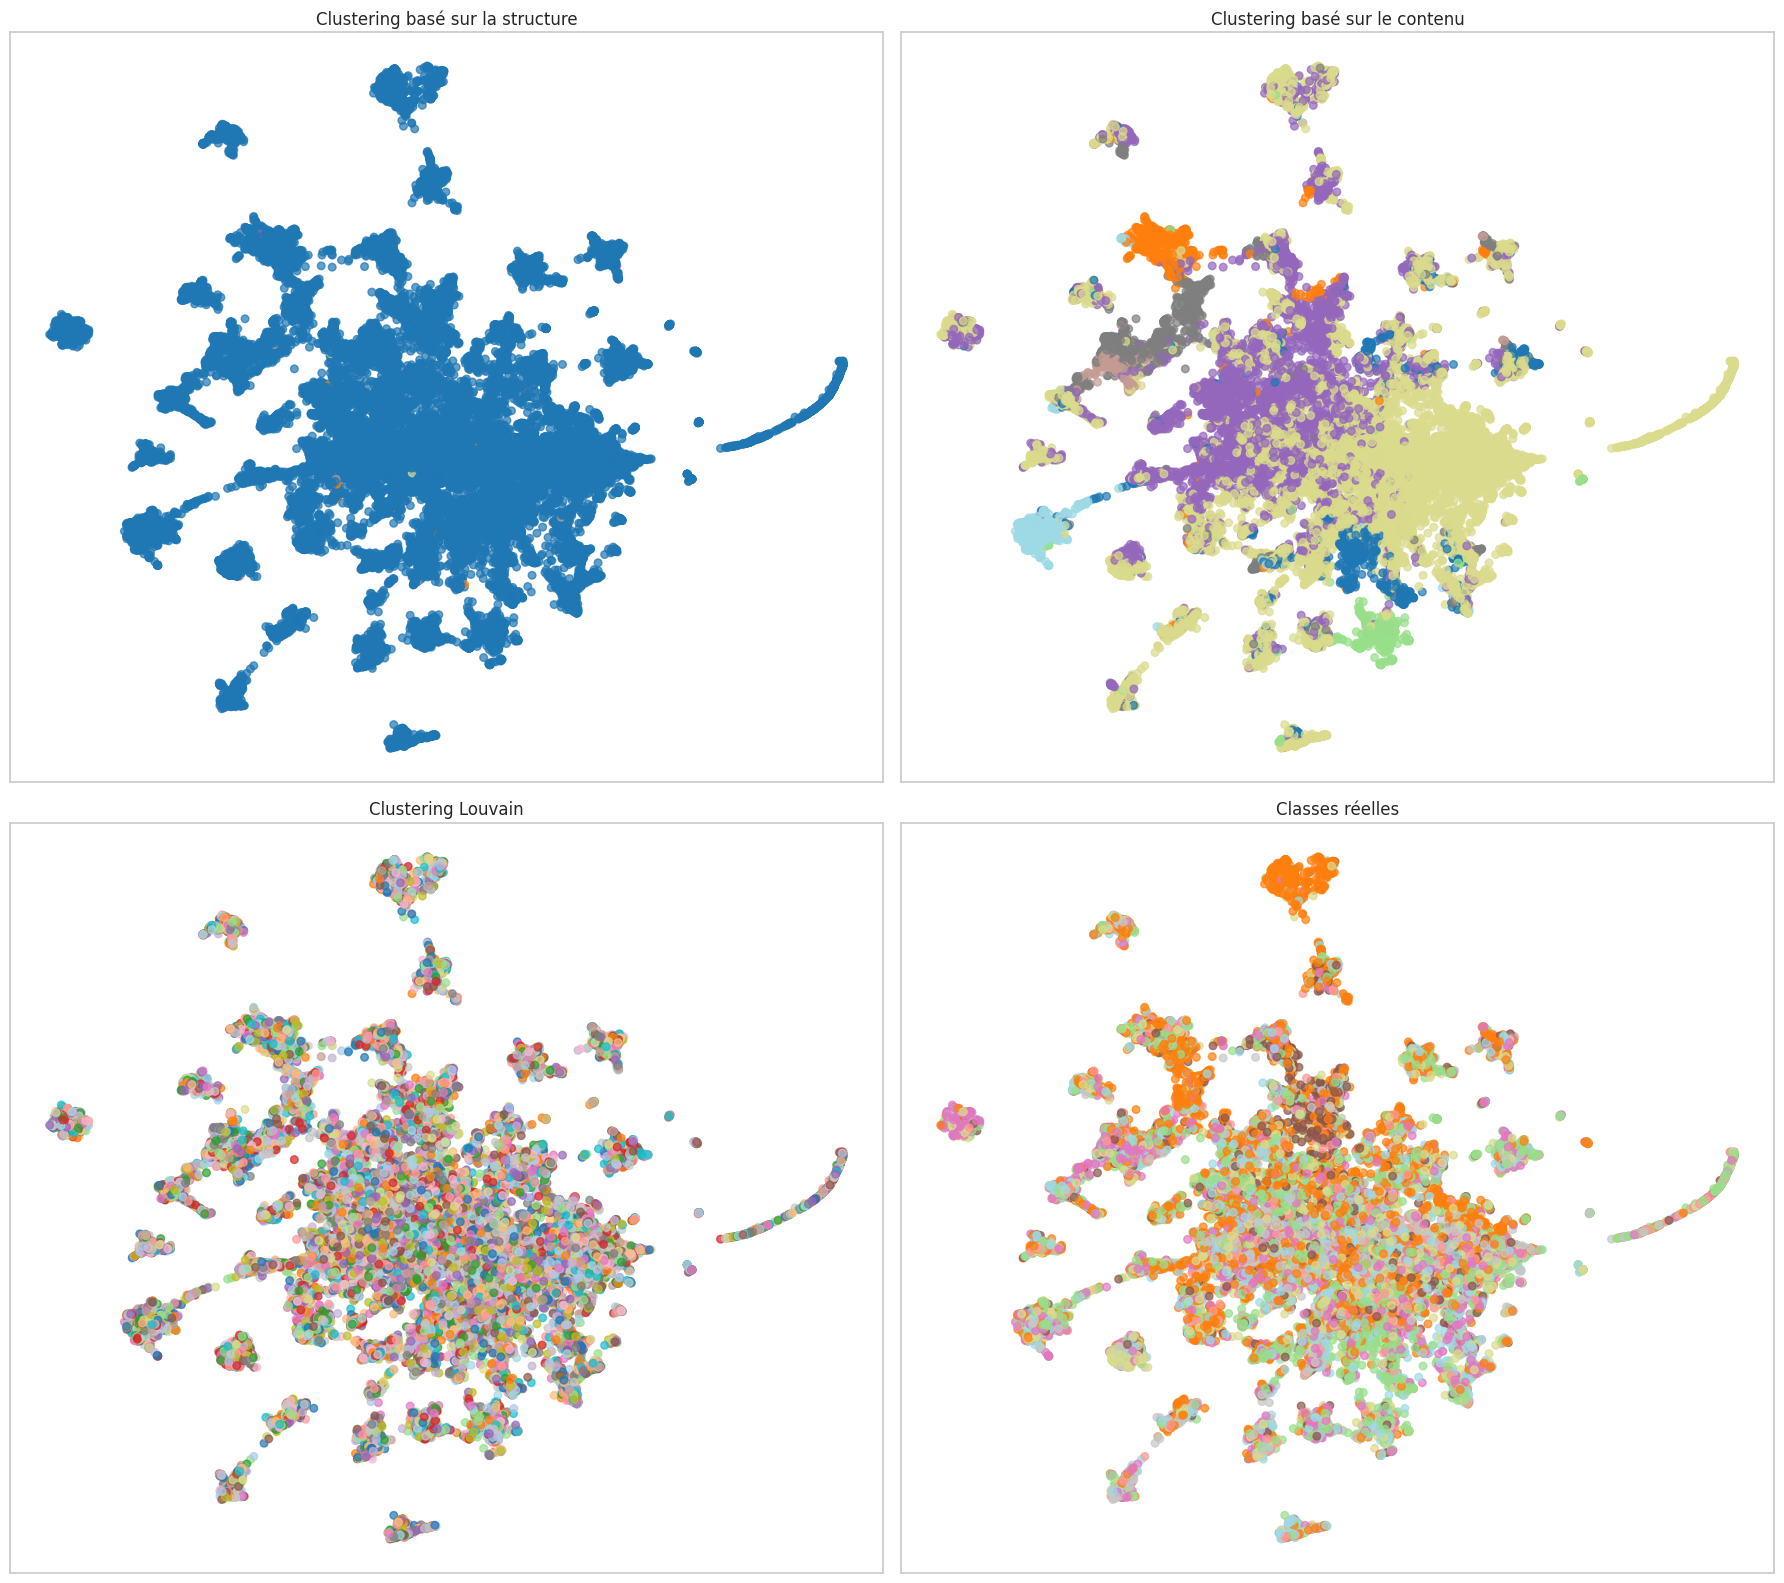

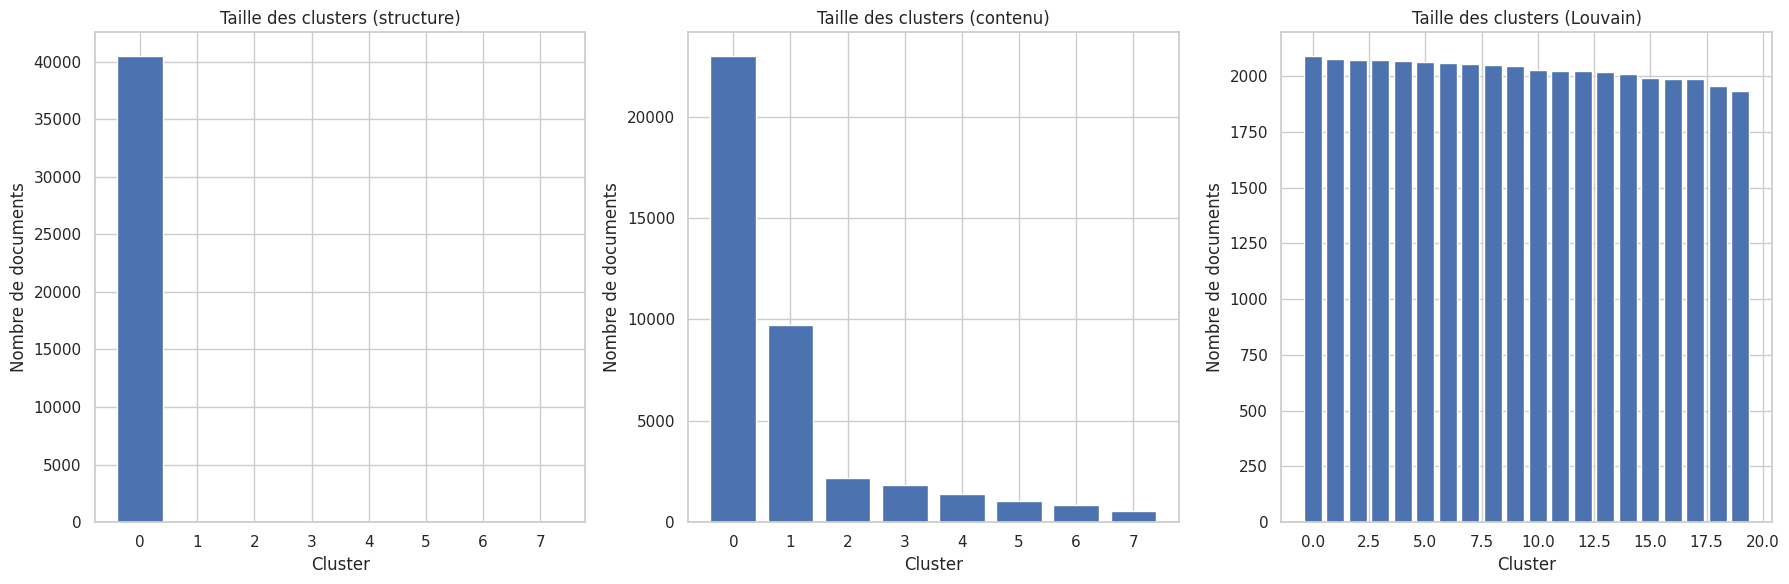

In [ ]:
# 4. Visualisation des clusters
visualize_clusters(df, document_ids, tfidf_matrix, labels_structure, labels_content, louvain_partition)


In [ ]:
# 5. Ajout des clusters au DataFrame
df_with_clusters = add_clusters_to_dataframe(df, document_ids, labels_structure, labels_content, louvain_partition)


Ajout des clusters au DataFrame...
DataFrame mis à jour avec les clusters. Dimensions: (40597, 12)
DataFrame sauvegardé dans 'corpus_with_clusters.csv'


# Classification supervisée des nœuds du graphe

In [ ]:
# Configuration pour l'affichage dans Jupyter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sentence_transformers import SentenceTransformer
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

# Configuration pour de meilleurs graphiques
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 10)

In [ ]:
# 1. Préparation des différentes représentations des documents
def prepare_document_representations(df, citation_graph=None, use_sbert=True):
    """
    Prépare différentes représentations des documents pour la classification supervisée.

    Args:
        df (pd.DataFrame): DataFrame contenant les documents
        citation_graph (nx.Graph, optional): Graphe de citation
        use_sbert (bool): Si True, utilise SBERT pour les embeddings; sinon TF-IDF

    Returns:
        dict: Dictionnaire contenant les différentes représentations
    """
    print("Préparation des représentations des documents...")

    # S'assurer que la classe est présente
    if 'class' not in df.columns:
        raise ValueError("La colonne 'class' est nécessaire pour la classification supervisée.")

    # 1. Préparation des caractéristiques textuelles
    print("Extraction des caractéristiques textuelles...")

    # Combiner le titre et l'abstract pour chaque document
    document_texts = []
    document_ids = []
    document_classes = []

    for idx, row in tqdm(df.iterrows(), total=len(df)):
        # Extraire le texte
        title = row['title'] if isinstance(row.get('title'), str) else ""
        abstract = row['abstract'] if isinstance(row.get('abstract'), str) else ""

        # Combiner (en donnant plus de poids au titre)
        combined_text = title + " " + title + " " + abstract

        document_texts.append(combined_text)
        document_ids.append(row['id'])
        document_classes.append(row['class'])

    # Vectorisation TF-IDF
    print("Vectorisation TF-IDF...")
    vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(document_texts)

    # Réduction de dimensionnalité pour TF-IDF
    n_components = min(300, tfidf_matrix.shape[1] - 1)
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    tfidf_reduced = svd.fit_transform(tfidf_matrix)

    # Embeddings SBERT si demandé
    text_embeddings = None
    if use_sbert:
        print("Génération des embeddings SBERT...")
        model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

        # Générer les embeddings par lots
        batch_size = 32
        text_embeddings = []

        for i in tqdm(range(0, len(document_texts), batch_size)):
            batch_texts = document_texts[i:i+batch_size]
            batch_embeddings = model.encode(batch_texts, show_progress_bar=False)
            text_embeddings.extend(batch_embeddings)

        text_embeddings = np.array(text_embeddings)

    # 2. Préparation des caractéristiques structurelles
    print("Extraction des caractéristiques structurelles...")

    structural_features = None
    if citation_graph is not None:
        # Créer un dictionnaire pour stocker les caractéristiques structurelles
        structural_features = {}

        # Calculer différentes mesures de centralité
        print("Calcul des mesures de centralité...")

        # Utiliser le graphe non dirigé pour certaines mesures
        undirected_graph = citation_graph.to_undirected()

        # Degré entrant et sortant (pour le graphe dirigé)
        in_degree = dict(citation_graph.in_degree())
        out_degree = dict(citation_graph.out_degree())

        # Degré total (pour le graphe non dirigé)
        degree = dict(undirected_graph.degree())

        # Extraire les caractéristiques pour chaque document
        structural_features_list = []

        for doc_id in document_ids:
            # Initialiser avec des valeurs par défaut
            features = [0, 0, 0]  # in_degree, out_degree, degree

            # Extraire les caractéristiques si le nœud existe
            if doc_id in citation_graph:
                features[0] = in_degree.get(doc_id, 0)
                features[1] = out_degree.get(doc_id, 0)
                features[2] = degree.get(doc_id, 0)

            structural_features_list.append(features)

        # Convertir en array numpy
        structural_features = np.array(structural_features_list)

        # Normaliser les caractéristiques
        struct_max = structural_features.max(axis=0)
        struct_max[struct_max == 0] = 1  # Éviter la division par zéro
        structural_features = structural_features / struct_max

    # 3. Préparation des ensembles d'entraînement et de test
    print("Préparation des ensembles d'entraînement et de test...")

    # Convertir les classes en numpy array
    classes = np.array(document_classes)

    # Créer un dictionnaire avec toutes les représentations
    representations = {
        'document_ids': document_ids,
        'classes': classes,
        'tfidf': tfidf_reduced
    }

    if text_embeddings is not None:
        representations['text_embeddings'] = text_embeddings

    if structural_features is not None:
        representations['structural'] = structural_features

    return representations

# 2. Classification supervisée
def train_and_evaluate_classifiers(representations, test_size=0.2, n_splits=5):
    """
    Entraîne et évalue différents classifieurs sur les différentes représentations.

    Args:
        representations (dict): Dictionnaire des représentations des documents
        test_size (float): Proportion de l'ensemble de test
        n_splits (int): Nombre de folds pour la validation croisée

    Returns:
        dict: Résultats de la classification
    """
    print("Entraînement et évaluation des classifieurs...")

    # Extraire les données
    document_ids = representations['document_ids']
    classes = representations['classes']

    # Créer les ensembles d'entraînement et de test
    train_indices, test_indices = train_test_split(
        np.arange(len(classes)),
        test_size=test_size,
        random_state=42,
        stratify=classes
    )

    # Classifieurs à tester
    classifiers = {
        'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
        'NeuralNetwork': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    }

    # Représentations à tester
    feature_sets = {}

    # TF-IDF
    if 'tfidf' in representations:
        feature_sets['TF-IDF'] = representations['tfidf']

    # Embeddings SBERT
    if 'text_embeddings' in representations:
        feature_sets['SBERT'] = representations['text_embeddings']

    # Caractéristiques structurelles
    if 'structural' in representations:
        feature_sets['Structural'] = representations['structural']

        # Combinaison avec TF-IDF
        if 'tfidf' in representations:
            # Combinaison par concaténation
            combined = np.hstack((
                representations['tfidf'],
                representations['structural']
            ))
            feature_sets['TF-IDF + Structural'] = combined

        # Combinaison avec SBERT
        if 'text_embeddings' in representations:
            # Combinaison par concaténation
            combined = np.hstack((
                representations['text_embeddings'],
                representations['structural']
            ))
            feature_sets['SBERT + Structural'] = combined

    # Dictionnaire pour stocker les résultats
    results = {
        'accuracy': {},
        'f1_weighted': {},
        'classification_reports': {},
        'confusion_matrices': {},
        'feature_importances': {},
        'models': {}
    }

    # Pour chaque représentation
    for feature_name, features in feature_sets.items():
        print(f"\nÉvaluation avec {feature_name}:")

        # Extraire les ensembles d'entraînement et de test
        X_train = features[train_indices]
        X_test = features[test_indices]
        y_train = classes[train_indices]
        y_test = classes[test_indices]

        # Initialiser les dictionnaires pour cette représentation
        results['accuracy'][feature_name] = {}
        results['f1_weighted'][feature_name] = {}
        results['classification_reports'][feature_name] = {}
        results['confusion_matrices'][feature_name] = {}
        results['feature_importances'][feature_name] = {}
        results['models'][feature_name] = {}

        # Pour chaque classifieur
        for clf_name, clf in classifiers.items():
            print(f"  - Classifieur: {clf_name}")

            # Entraîner le classifieur
            clf.fit(X_train, y_train)

            # Prédire sur l'ensemble de test
            y_pred = clf.predict(X_test)

            # Évaluer les performances
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            report = classification_report(y_test, y_pred, output_dict=True)
            conf_matrix = confusion_matrix(y_test, y_pred)

            # Stocker les résultats
            results['accuracy'][feature_name][clf_name] = accuracy
            results['f1_weighted'][feature_name][clf_name] = f1
            results['classification_reports'][feature_name][clf_name] = report
            results['confusion_matrices'][feature_name][clf_name] = conf_matrix
            results['models'][feature_name][clf_name] = clf

            # Stocker les importances de caractéristiques si disponibles
            if hasattr(clf, 'feature_importances_'):
                results['feature_importances'][feature_name][clf_name] = clf.feature_importances_

            print(f"    Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}")

    return results, train_indices, test_indices

# 3. Analyse des résultats
def analyze_classification_results(results, representations):
    """
    Analyse et visualise les résultats de la classification.

    Args:
        results (dict): Résultats de la classification
        representations (dict): Représentations des documents
    """
    print("Analyse des résultats de classification...")

    # 1. Comparaison des performances
    print("\nComparaison des performances des classifieurs selon les représentations:")

    # Créer un DataFrame pour les scores d'accuracy
    accuracy_df = pd.DataFrame(results['accuracy'])

    # Visualiser les scores d'accuracy
    plt.figure(figsize=(12, 8))
    sns.heatmap(accuracy_df, annot=True, cmap='YlGnBu', fmt='.4f')
    plt.title('Accuracy par classifieur et représentation')
    plt.ylabel('Classifieur')
    plt.xlabel('Représentation')
    plt.tight_layout()
    plt.show()

    # Créer un DataFrame pour les scores F1
    f1_df = pd.DataFrame(results['f1_weighted'])

    # Visualiser les scores F1
    plt.figure(figsize=(12, 8))
    sns.heatmap(f1_df, annot=True, cmap='YlGnBu', fmt='.4f')
    plt.title('F1-score par classifieur et représentation')
    plt.ylabel('Classifieur')
    plt.xlabel('Représentation')
    plt.tight_layout()
    plt.show()

    # 2. Analyse des meilleurs classifieurs
    print("\nMeilleurs classifieurs par représentation:")

    # Trouver le meilleur classifieur pour chaque représentation
    for feature_name in accuracy_df.columns:
        best_clf = accuracy_df[feature_name].idxmax()
        accuracy = accuracy_df[feature_name].max()
        f1 = f1_df[feature_name][best_clf]

        print(f"Représentation: {feature_name}")
        print(f"  Meilleur classifieur: {best_clf}")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  F1-score: {f1:.4f}")

        # Afficher le rapport de classification complet
        report = results['classification_reports'][feature_name][best_clf]

        # Convertir le rapport en DataFrame pour une meilleure lisibilité
        report_df = pd.DataFrame(report).T
        report_df = report_df.drop('accuracy', errors='ignore')

        print("\n  Rapport de classification:")
        display(report_df.round(4))

    # 3. Visualisation des matrices de confusion
    print("\nMatrices de confusion pour les meilleurs classifieurs:")

    # Nombre de représentations
    n_representations = len(accuracy_df.columns)

    # Définir la disposition des sous-graphiques
    n_cols = min(3, n_representations)
    n_rows = (n_representations + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols * 6, n_rows * 5))

    for i, feature_name in enumerate(accuracy_df.columns):
        # Trouver le meilleur classifieur
        best_clf = accuracy_df[feature_name].idxmax()

        # Extraire la matrice de confusion
        cm = results['confusion_matrices'][feature_name][best_clf]

        # Créer le sous-graphique
        plt.subplot(n_rows, n_cols, i + 1)

        # Normaliser la matrice de confusion
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        # Afficher la matrice de confusion
        sns.heatmap(cm_norm, annot=cm, fmt='d', cmap='Blues', cbar=False)
        plt.title(f"{feature_name} - {best_clf}")
        plt.ylabel('Vraie classe')
        plt.xlabel('Classe prédite')

    plt.tight_layout()
    plt.show()

    # 4. Analyse des importances de caractéristiques (si disponibles)
    if 'TF-IDF' in results['feature_importances'] and 'RandomForest' in results['feature_importances']['TF-IDF']:
        print("\nCaractéristiques les plus importantes pour TF-IDF avec Random Forest:")

        # Extraire les importances
        importances = results['feature_importances']['TF-IDF']['RandomForest']

        # Afficher les 20 caractéristiques les plus importantes
        top_n = 20
        indices = np.argsort(importances)[-top_n:]

        plt.figure(figsize=(10, 8))
        plt.barh(range(top_n), importances[indices])
        plt.yticks(range(top_n), [f"Feature {i}" for i in indices])
        plt.xlabel('Importance')
        plt.title(f'Top {top_n} caractéristiques TF-IDF')
        plt.tight_layout()
        plt.show()

# 4. Analyse des erreurs
def analyze_classification_errors(results, representations, train_indices, test_indices):
    """
    Analyse détaillée des erreurs de classification.

    Args:
        results (dict): Résultats de la classification
        representations (dict): Représentations des documents
        train_indices (np.array): Indices des documents d'entraînement
        test_indices (np.array): Indices des documents de test
    """
    print("Analyse des erreurs de classification...")

    # Extraire les données
    document_ids = representations['document_ids']
    classes = representations['classes']

    # Indices de test
    test_doc_ids = [document_ids[i] for i in test_indices]
    test_classes = classes[test_indices]

    # Sélectionner les représentations avec les meilleurs résultats
    accuracy_df = pd.DataFrame(results['accuracy'])
    best_textual = None
    best_structural = None
    best_combined = None

    # Trouver les meilleures représentations
    if 'TF-IDF' in accuracy_df.columns:
        best_textual = 'TF-IDF'
    if 'SBERT' in accuracy_df.columns and (best_textual is None or accuracy_df['SBERT'].max() > accuracy_df[best_textual].max()):
        best_textual = 'SBERT'

    if 'Structural' in accuracy_df.columns:
        best_structural = 'Structural'

    if 'TF-IDF + Structural' in accuracy_df.columns:
        best_combined = 'TF-IDF + Structural'
    if 'SBERT + Structural' in accuracy_df.columns and (best_combined is None or accuracy_df['SBERT + Structural'].max() > accuracy_df[best_combined].max()):
        best_combined = 'SBERT + Structural'

    # S'assurer que nous avons des représentations à comparer
    if best_textual is None or best_structural is None or best_combined is None:
        print("Impossible de comparer les erreurs: certaines représentations manquent.")
        return

    # Trouver les meilleurs classifieurs pour chaque type de représentation
    best_textual_clf = accuracy_df[best_textual].idxmax()
    best_structural_clf = accuracy_df[best_structural].idxmax()
    best_combined_clf = accuracy_df[best_combined].idxmax()

    print(f"Meilleure représentation textuelle: {best_textual} avec {best_textual_clf}")
    print(f"Meilleure représentation structurelle: {best_structural} avec {best_structural_clf}")
    print(f"Meilleure représentation combinée: {best_combined} avec {best_combined_clf}")

    # Obtenir les prédictions
    textual_model = results['models'][best_textual][best_textual_clf]
    structural_model = results['models'][best_structural][best_structural_clf]
    combined_model = results['models'][best_combined][best_combined_clf]

    textual_features = representations[best_textual.lower() if best_textual.lower() in representations else 'text_embeddings' if best_textual == 'SBERT' else 'tfidf']
    structural_features = representations['structural']
    combined_features = representations[best_combined.lower() if best_combined.lower() in representations else 'text_embeddings' if 'SBERT' in best_combined else 'tfidf']

    textual_preds = textual_model.predict(textual_features[test_indices])
    structural_preds = structural_model.predict(structural_features[test_indices])
    combined_preds = combined_model.predict(combined_features[test_indices])

    # Créer un DataFrame pour l'analyse des erreurs
    error_df = pd.DataFrame({
        'document_id': test_doc_ids,
        'true_class': test_classes,
        'textual_pred': textual_preds,
        'structural_pred': structural_preds,
        'combined_pred': combined_preds
    })

    # Ajouter des colonnes pour les erreurs
    error_df['textual_error'] = error_df['textual_pred'] != error_df['true_class']
    error_df['structural_error'] = error_df['structural_pred'] != error_df['true_class']
    error_df['combined_error'] = error_df['combined_pred'] != error_df['true_class']

    # Statistiques d'erreur
    print("\nStatistiques d'erreur:")
    print(f"Erreurs avec représentation textuelle: {error_df['textual_error'].sum()} / {len(error_df)} ({error_df['textual_error'].mean():.2%})")
    print(f"Erreurs avec représentation structurelle: {error_df['structural_error'].sum()} / {len(error_df)} ({error_df['structural_error'].mean():.2%})")
    print(f"Erreurs avec représentation combinée: {error_df['combined_error'].sum()} / {len(error_df)} ({error_df['combined_error'].mean():.2%})")

    # Analyse des erreurs communes et spécifiques
    common_errors = error_df[error_df['textual_error'] & error_df['structural_error']].shape[0]
    textual_only_errors = error_df[error_df['textual_error'] & ~error_df['structural_error']].shape[0]
    structural_only_errors = error_df[~error_df['textual_error'] & error_df['structural_error']].shape[0]

    print(f"\nErreurs communes (textuelle et structurelle): {common_errors} / {len(error_df)} ({common_errors/len(error_df):.2%})")
    print(f"Erreurs spécifiques à la représentation textuelle: {textual_only_errors} / {len(error_df)} ({textual_only_errors/len(error_df):.2%})")
    print(f"Erreurs spécifiques à la représentation structurelle: {structural_only_errors} / {len(error_df)} ({structural_only_errors/len(error_df):.2%})")

    # Visualisation des erreurs par classe
    plt.figure(figsize=(12, 8))

    # Compter les erreurs par classe
    error_by_class = error_df.groupby('true_class')[['textual_error', 'structural_error', 'combined_error']].mean()

    # Afficher les taux d'erreur par classe
    error_by_class.plot(kind='bar')
    plt.title('Taux d\'erreur par classe et par représentation')
    plt.xlabel('Classe')
    plt.ylabel('Taux d\'erreur')
    plt.xticks(rotation=45)
    plt.legend(['Textuelle', 'Structurelle', 'Combinée'])
    plt.tight_layout()
    plt.show()

    # Analyse des cas où la combinaison fait mieux
    better_with_combined = error_df[
        (error_df['textual_error'] | error_df['structural_error']) &
        ~error_df['combined_error']
    ]

    print(f"\nCas où la représentation combinée est meilleure: {len(better_with_combined)} / {len(error_df)} ({len(better_with_combined)/len(error_df):.2%})")

    # Analyse des cas où la combinaison fait moins bien
    worse_with_combined = error_df[
        ~(error_df['textual_error'] & error_df['structural_error']) &
        error_df['combined_error']
    ]

    print(f"Cas où la représentation combinée est moins bonne: {len(worse_with_combined)} / {len(error_df)} ({len(worse_with_combined)/len(error_df):.2%})")

    # Distribution des classes dans les erreurs communes
    common_error_class_dist = error_df[error_df['textual_error'] & error_df['structural_error']]['true_class'].value_counts(normalize=True)

    print("\nDistribution des classes dans les erreurs communes:")
    display(common_error_class_dist)

    # Distribution des classes dans les erreurs spécifiques à la représentation textuelle
    textual_error_class_dist = error_df[error_df['textual_error'] & ~error_df['structural_error']]['true_class'].value_counts(normalize=True)

    print("\nDistribution des classes dans les erreurs spécifiques à la représentation textuelle:")
    display(textual_error_class_dist)

    # Distribution des classes dans les erreurs spécifiques à la représentation structurelle
    structural_error_class_dist = error_df[~error_df['textual_error'] & error_df['structural_error']]['true_class'].value_counts(normalize=True)

    print("\nDistribution des classes dans les erreurs spécifiques à la représentation structurelle:")
    display(structural_error_class_dist)


In [ ]:
# Vérifier que df est défini (chargé dans les parties précédentes)
if 'df' not in globals():
    print("ERREUR: Le DataFrame 'df' n'est pas défini. Veuillez exécuter d'abord les parties précédentes.")
else:
    # Vérifier que la colonne class existe
    if 'class' not in df.columns:
        print("ERREUR: La colonne 'class' est nécessaire pour la classification supervisée.")
    else:
        # Récupérer ou construire le graphe de citation
        citation_graph = None
        if 'citation_graph' in globals():
            citation_graph = globals()['citation_graph']

In [ ]:
# 1. Préparation des représentations
representations = prepare_document_representations(df, citation_graph, use_sbert=True)


Préparation des représentations des documents...
Extraction des caractéristiques textuelles...


  0%|          | 0/40597 [00:00<?, ?it/s]

Vectorisation TF-IDF...
Génération des embeddings SBERT...


  0%|          | 0/1269 [00:00<?, ?it/s]

Extraction des caractéristiques structurelles...
Préparation des ensembles d'entraînement et de test...


In [ ]:
# 2. Classification
test_size = 0.2
results, train_indices, test_indices = train_and_evaluate_classifiers(representations, test_size)


Entraînement et évaluation des classifieurs...

Évaluation avec TF-IDF:
  - Classifieur: RandomForest
    Accuracy: 0.3839, F1-score: 0.3326
  - Classifieur: SVM
    Accuracy: 0.4266, F1-score: 0.3904
  - Classifieur: LogisticRegression
    Accuracy: 0.4095, F1-score: 0.3676
  - Classifieur: NeuralNetwork
    Accuracy: 0.3270, F1-score: 0.3249

Évaluation avec SBERT:
  - Classifieur: RandomForest
    Accuracy: 0.3674, F1-score: 0.2925
  - Classifieur: SVM
    Accuracy: 0.4371, F1-score: 0.4023
  - Classifieur: LogisticRegression
    Accuracy: 0.3964, F1-score: 0.3653
  - Classifieur: NeuralNetwork
    Accuracy: 0.2983, F1-score: 0.2961


Analyse des résultats de classification...

Comparaison des performances des classifieurs selon les représentations:


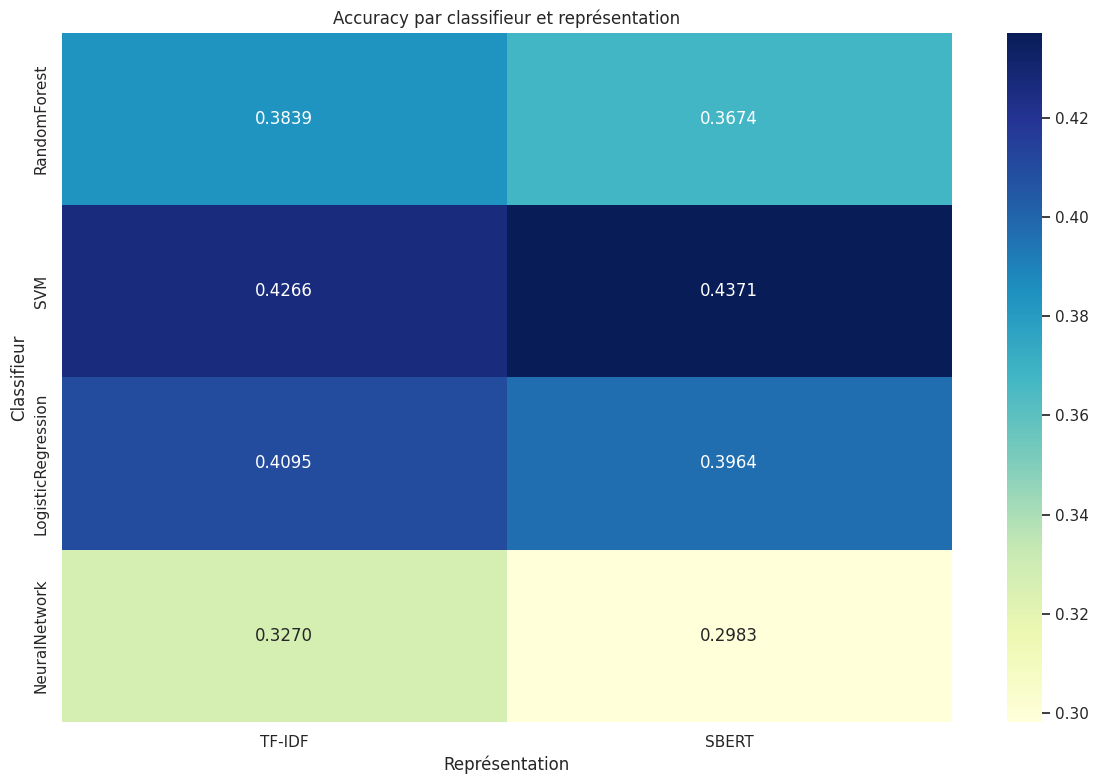

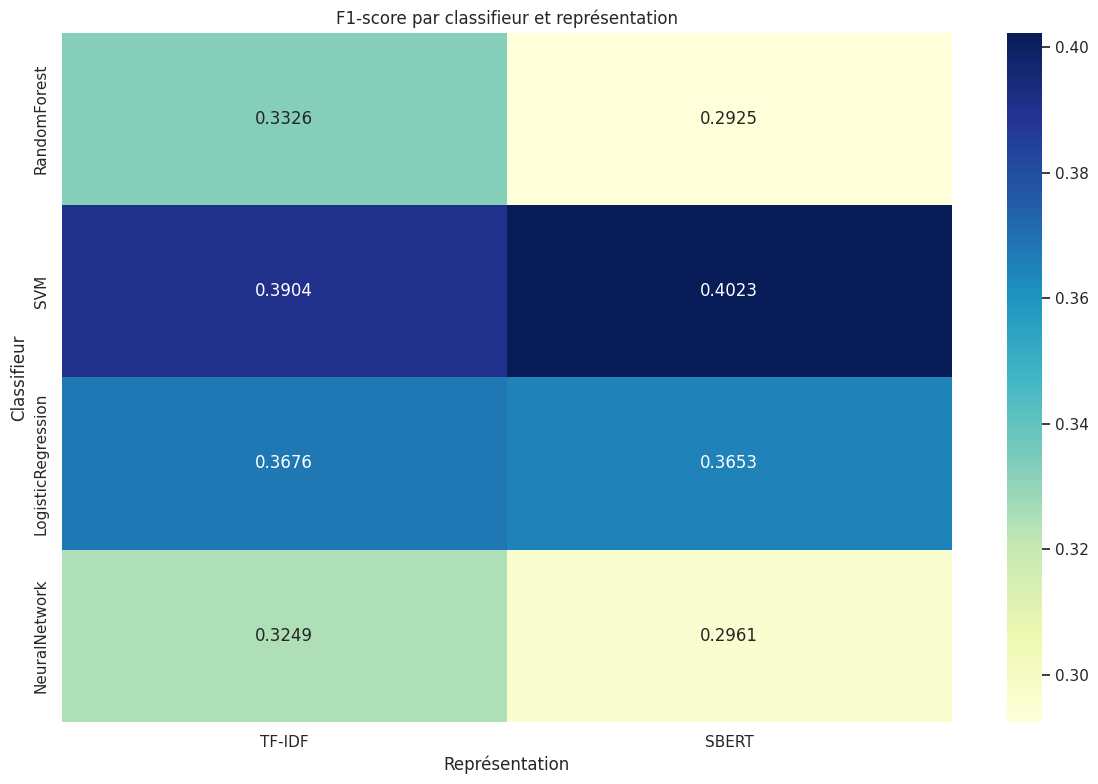


Meilleurs classifieurs par représentation:
Représentation: TF-IDF
  Meilleur classifieur: SVM
  Accuracy: 0.4266
  F1-score: 0.3904

  Rapport de classification:


,precision,recall,f1-score,support
1,0.4899,0.7450,0.5911,2020.0
2,0.3879,0.5629,0.4593,1478.0
3,0.3883,0.0873,0.1426,458.0
4,0.4231,0.3080,0.3565,500.0
5,0.4072,0.4201,0.4136,1045.0
6,0.3984,0.3459,0.3703,714.0
7,0.3848,0.1347,0.1995,943.0
8,0.2941,0.1247,0.1752,962.0
macro avg,0.3967,0.3411,0.3385,8120.0
weighted avg,0.4074,0.4266,0.3904,8120.0


Représentation: SBERT
  Meilleur classifieur: SVM
  Accuracy: 0.4371
  F1-score: 0.4023

  Rapport de classification:


,precision,recall,f1-score,support
1,0.5047,0.7703,0.6098,2020.0
2,0.4125,0.5372,0.4666,1478.0
3,0.4083,0.1070,0.1696,458.0
4,0.4222,0.3420,0.3779,500.0
5,0.3883,0.4392,0.4122,1045.0
6,0.3854,0.3557,0.3700,714.0
7,0.4211,0.1527,0.2241,943.0
8,0.3020,0.1268,0.1786,962.0
macro avg,0.4056,0.3539,0.3511,8120.0
weighted avg,0.4182,0.4371,0.4023,8120.0



Matrices de confusion pour les meilleurs classifieurs:


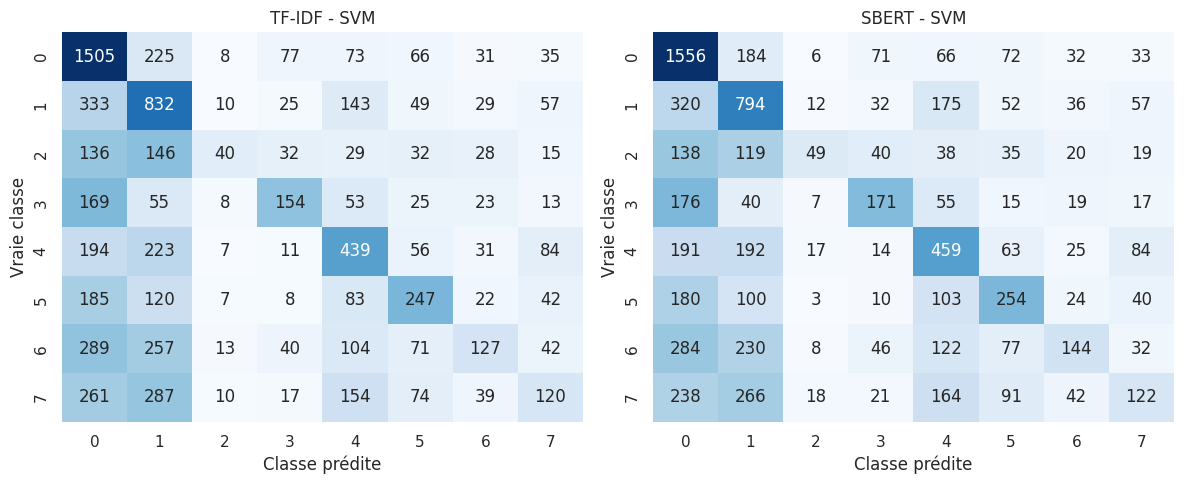


Caractéristiques les plus importantes pour TF-IDF avec Random Forest:


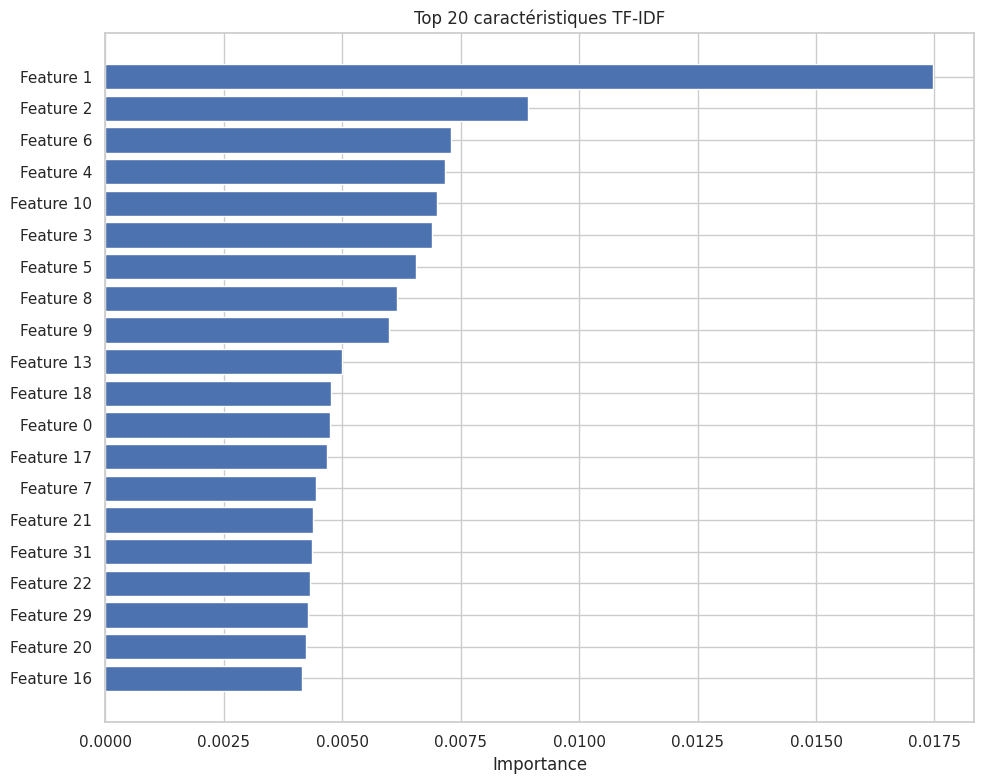

In [ ]:
# 3. Analyse des résultats
analyze_classification_results(results, representations)


In [ ]:
# 4. Analyse des erreurs
analyze_classification_errors(results, representations, train_indices, test_indices)


Analyse des erreurs de classification...
Impossible de comparer les erreurs: certaines représentations manquent.


In [ ]:
# to convert to pdf
from google.colab import drive
drive.mount('/content/drive')

!apt-get install -y texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

#Replace with your notebook name
notebook_name = "Network Analysis for Information Retrieval - Project.ipynb"
# Replace "/content/drive/My Drive/Colab Notebooks"
# with path to the notebook with your project
!cp "/content/drive/My Drive/Colab Notebooks/{notebook_name}" ./
!jupyter nbconvert --to pdf "{notebook_name}"
# download and submit the generated PDF from the Files (Fichiers) panel (left sidebar)

MessageError: Error: credential propagation was unsuccessful